In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install catboost
!pip install keras-tuner

In [ ]:
!pip install lime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import time
from astropy.time import Time
import math
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import keras_tuner as kt
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Data inspection

In [ ]:
df.dtypes

Name                              int64
Epoch Date Close Approach       float64
Relative Velocity km per sec     object
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Semi Major Axis                 float64
Asc Node Longitude              float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
approach_year                   float64
approach_month                  float64
approach_day                    float64
Orbital Period                   object
Orbit Uncertainity               object
Hazardous                          bool
dtype: object

This is all the columns which are present in this dataset.

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_cols

['Name',
 'Epoch Date Close Approach',
 'Relative Velocity km per hr',
 'Miles per hour',
 'Miss Dist.(Astronomical)',
 'Miss Dist.(lunar)',
 'Miss Dist.(kilometers)',
 'Miss Dist.(miles)',
 'Jupiter Tisserand Invariant',
 'Epoch Osculation',
 'Semi Major Axis',
 'Asc Node Longitude',
 'Perihelion Arg',
 'Aphelion Dist',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion',
 'approach_year',
 'approach_month',
 'approach_day']

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Relative Velocity km per sec', 'Orbital Period', 'Orbit Uncertainity']

This is the seperation between both the Numerical and Categorical columns

In [ ]:
df.describe()

Name  Epoch Date Close Approach  Relative Velocity km per hr  \
count  4.534000e+03               3.280000e+03                  3033.000000   
mean   3.268624e+06               1.178921e+12                 50516.969113   
std    5.517954e+05               1.986535e+11                 26530.144294   
min    2.000433e+06               7.889472e+11                  1207.814804   
25%    3.092344e+06               1.014365e+12                 30437.415189   
50%    3.513224e+06               1.202458e+12                 46968.245275   
75%    3.691155e+06               1.354954e+12                 65210.346095   
max    3.781897e+06               1.473318e+12                160681.487851   

       Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  \
count     3668.000000               3933.000000        3417.000000   
mean     31312.455735                  0.258221         100.709883   
std      16386.183907                  0.146070          56.938739   
min        750.489149                  0.000178           0.187669   
25%      18843.393552                  0.135807          52.877514   
50%      28959.416222                  0.265281         104.261452   
75%      40331.941346                  0.387033         150.434433   
max      99841.227826                  0.499884         194.359650   

       Miss Dist.(kilometers)  Miss Dist.(miles)  Jupiter Tisserand Invariant  \
count            3.166000e+03       3.882000e+03                  2802.000000   
mean             3.842441e+07       2.391178e+07                     5.126265   
std              2.207442e+07       1.357595e+07                     1.197144   
min              2.660989e+04       1.653462e+04                     2.367000   
25%              1.950318e+07       1.246634e+07                     4.179250   
50%              3.987901e+07       2.476464e+07                     5.102500   
75%              5.769962e+07       3.581782e+07                     6.043000   
max              7.478160e+07       4.646713e+07                     9.025000   

       Epoch Osculation  Semi Major Axis  Asc Node Longitude  Perihelion Arg  \
count      3.007000e+03      3346.000000         3438.000000     3400.000000   
mean       2.457720e+06         1.358242          172.185790      185.148924   
std        9.248399e+02         0.465313          103.055919      103.417240   
min        2.450936e+06         0.615920            0.001941        0.006918   
25%        2.458000e+06         0.990008           83.288427       96.100513   
50%        2.458000e+06         1.223551          173.895246      192.420121   
75%        2.458000e+06         1.626350          253.635285      273.067950   
max        2.458000e+06         2.568553          359.905890      359.993098   

       Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  \
count    3719.000000     2.970000e+03   3616.000000  3026.000000   
mean        1.898115     2.457741e+06    182.735237     0.761090   
std         0.834499     9.155433e+02    107.757042     0.337745   
min         0.803765     2.450100e+06      0.003191     0.239363   
25%         1.260397     2.457826e+06     87.066671     0.483841   
50%         1.590005     2.457976e+06    189.051112     0.737684   
75%         2.331365     2.458109e+06    278.038676     1.002870   
max         4.662158     2.458706e+06    359.917991     1.946801   

       approach_year  approach_month  approach_day  
count    3715.000000     3006.000000   3991.000000  
mean     2006.920592        6.474385     14.896517  
std         6.292621        3.462926      5.717762  
min      1995.000000        1.000000      1.000000  
25%      2002.000000        3.000000      8.000000  
50%      2008.000000        7.000000     15.000000  
75%      2013.000000       10.000000     22.000000  
max      2016.000000       12.000000     22.000000

In [ ]:
for col in numerical_cols:
    col_range = df[col].max() - df[col].min()
    print(f"Range of {col}: {col_range}")

Range of Name: 1781464
Range of Epoch Date Close Approach: 684370800000.0
Range of Relative Velocity km per hr: 159473.6730473791
Range of Miles per hour: 99090.7386776896
Range of Miss Dist.(Astronomical): 0.4997062264
Range of Miss Dist.(lunar): 194.1719806194
Range of Miss Dist.(kilometers): 74754990.11328125
Range of Miss Dist.(miles): 46450597.3828125
Range of Jupiter Tisserand Invariant: 6.658
Range of Epoch Osculation: 7064.0
Range of Semi Major Axis: 1.952632847858134
Range of Asc Node Longitude: 359.9039492008274
Range of Perihelion Arg: 359.9861803054345
Range of Aphelion Dist: 3.8583928670953638
Range of Perihelion Time: 8605.420016764197
Range of Mean Anomaly: 359.91479908695675
Range of Mean Motion: 1.7074373334606099
Range of approach_year: 21.0
Range of approach_month: 11.0
Range of approach_day: 21.0


This is the description of all the numerical features in the dataset to get an idea of the range and other numerical factors of the columns.

In [ ]:
df.isnull().sum()

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

This is the number of null values in all columns.

In [ ]:

numerical_cols

['Name',
 'Epoch Date Close Approach',
 'Relative Velocity km per hr',
 'Miles per hour',
 'Miss Dist.(Astronomical)',
 'Miss Dist.(lunar)',
 'Miss Dist.(kilometers)',
 'Miss Dist.(miles)',
 'Jupiter Tisserand Invariant',
 'Epoch Osculation',
 'Semi Major Axis',
 'Asc Node Longitude',
 'Perihelion Arg',
 'Aphelion Dist',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion',
 'approach_year',
 'approach_month',
 'approach_day']

In [ ]:
categorical_cols

['Relative Velocity km per sec', 'Orbital Period', 'Orbit Uncertainity']

For filling the null values, we will employ multiple techniques and unique approaches for different columns, and will leave imputation for the end, or only when we can ensure that the values will be imputed well. Otherwise, we will fill using various different techniques which you can see in the next section.

# EDA,DATA-CLEANING AND FEATURE ENGINEERING


*   The majority of the nan value replacement,creation of important feature and drawing statistical inferences from the data is done under this section.
*   This section itself is divided into other major sections via markdown cells indicating what is happening under them



In [ ]:
df

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0     3703080               7.889472e+11                    Very Slow   
1     3723955                        NaN                         Slow   
2     2446862               7.895520e+11                          NaN   
3     3092506               7.901568e+11                    Very Slow   
4     3514799               7.901568e+11                    Very Slow   
...       ...                        ...                          ...   
4529  3759007               1.473318e+12                         Slow   
4530  3759295                        NaN                    Very Slow   
4531  3759714               1.473318e+12                    Very Slow   
4532  3759720                        NaN                          NaN   
4533  3772978               1.473318e+12                    Very Fast   

      Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                    22017.003799    13680.509944                  0.419483   
1                    65210.346095    40519.173105                       NaN   
2                    27326.560182    16979.661798                  0.050956   
3                    40225.948191    24994.839864                       NaN   
4                    35426.991794             NaN                  0.407832   
...                           ...             ...                       ...   
4529                 79755.354273    49556.875548                       NaN   
4530                 11610.539577     7214.337772                  0.006469   
4531                 25889.910626    16086.983633                  0.061009   
4532                          NaN    25393.489071                  0.260760   
4533                129408.666253    80409.512650                       NaN   

      Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0            163.178711            6.275369e+07       3.899334e+07   
1                   NaN            5.729815e+07       3.560342e+07   
2             19.821890            7.622912e+06       4.736658e+06   
3                   NaN                     NaN       2.652237e+07   
4            158.646713            6.101082e+07                NaN   
...                 ...                     ...                ...   
4529                NaN            6.187511e+06                NaN   
4530           2.516399            9.677324e+05       6.013211e+05   
4531                NaN            9.126775e+06       5.671115e+06   
4532         101.435493            3.900908e+07       2.423912e+07   
4533                NaN            6.916986e+07       4.298016e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
0                             NaN               NaN         1.407011   
1                             NaN         2458000.5         1.107776   
2                           4.557         2458000.5         1.458824   
3                           5.093         2458000.5              NaN   
4                           5.154               NaN         1.225615   
...                           ...               ...              ...   
4529                        5.156         2457637.5         1.161429   
4530                          NaN         2458000.5              NaN   
4531                        4.410         2458000.5         1.528234   
4532                        4.477               NaN              NaN   
4533                        4.108               NaN         1.474045   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0             314.373913       57.257470       2.005764              NaN   
1             136.717242             NaN       1.497352     2.457795e+06   
2             259.475979      248.415038       1.966857     2.458120e+06   
3              57.173266             NaN       1.527904     2.457902e+06   
4              84.629307      158.263596            NaN     2.457814e+06   
...                  

In [ ]:
df.isnull().sum()

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    819
approach_month                  1528
approach_day                     543
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

In [ ]:
df.isnull().sum().mean()/4534

0.23321937950301427

### **Handling** **Dates**



In [ ]:
#unix time to pd_datetime
df['Epoch Date Close Approach'] = pd.to_datetime(df['Epoch Date Close Approach'], unit='ms', errors='coerce')

In [ ]:
#year
df_year = df[df['Epoch Date Close Approach'].notna() & df['approach_year'].isna()]

for index, row in df_year.iterrows():
  df_year.loc[index, 'approach_year'] = row['Epoch Date Close Approach'].year

df.loc[df['Epoch Date Close Approach'].notna() & df['approach_year'].isna(), 'approach_year'] = df_year['approach_year']

#month
df_month = df[df['Epoch Date Close Approach'].notna() & df['approach_month'].isna()]

for index, row in df_month.iterrows():
  df_month.loc[index, 'approach_month'] = row['Epoch Date Close Approach'].month

df.loc[df['Epoch Date Close Approach'].notna() & df['approach_month'].isna(), 'approach_month'] = df_month['approach_month']

#day
df_day = df[df['Epoch Date Close Approach'].notna() & df['approach_day'].isna()]

for index, row in df_day.iterrows():
  df_day.loc[index, 'approach_day'] = row['Epoch Date Close Approach'].day

df.loc[df['Epoch Date Close Approach'].notna() & df['approach_day'].isna(), 'approach_day'] = df_day['approach_day']

In [ ]:
df.isnull().sum()

Name                               0
Epoch Date Close Approach       1254
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                 1188
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                     1508
approach_year                    205
approach_month                   428
approach_day                     163
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
dtype: int64

In [ ]:
df['approach_year'].value_counts()

approach_year
2014.0    311
2015.0    308
2012.0    253
2013.0    231
2011.0    225
2016.0    220
2008.0    212
2010.0    212
2009.0    210
2006.0    207
2007.0    201
2004.0    187
2005.0    173
1998.0    169
2000.0    164
2003.0    161
2001.0    159
2002.0    156
1995.0    152
1999.0    148
1997.0    146
1996.0    124
Name: count, dtype: int64

In [ ]:
df_year = df[df['approach_year'] == 1995.0]
df_year['Name']

0      3703080
1      3723955
2      2446862
3      3092506
4      3514799
        ...   
154    3739251
155    2033342
156    2397847
157    3455137
158    3102683
Name: Name, Length: 152, dtype: int64

In [ ]:
for year in df['approach_year'].unique():
    if pd.isnull(year):
        continue

    first_index = df[df['approach_year'] == year].index[0]
    last_index = df[df['approach_year'] == year].index[-1]

    # Fill null values within the range
    df.loc[first_index:last_index, 'approach_year'] = df.loc[first_index:last_index, 'approach_year'].fillna(year)

In [ ]:
df[df['approach_year'] == 1995.0]['approach_month']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
154    12.0
155    12.0
156    12.0
157    12.0
158    12.0
Name: approach_month, Length: 159, dtype: float64

In [ ]:
for year in df['approach_year'].unique():
    if pd.isnull(year):
        continue

    for month in df['approach_month'].unique():
        if pd.isnull(month):
            continue

        mask = (df['approach_year'] == year) & (df['approach_month'] == month)

        if not df[mask].empty:
            first_index = df[mask].index[0]
            last_index = df[mask].index[-1]

            df.loc[first_index:last_index, 'approach_month'] = df.loc[first_index:last_index, 'approach_month'].fillna(month)

In [ ]:
for year in df['approach_year'].unique():
    if pd.isnull(year):
        continue

    for month in df['approach_month'].unique():
        if pd.isnull(month):
            continue

        for day in df['approach_day'].unique():
            if pd.isnull(day):
                continue

            mask = (df['approach_year'] == year) & (df['approach_month'] == month) & (df['approach_day'] == day)

            if not df[mask].empty:
                first_index = df[mask].index[0]
                last_index = df[mask].index[-1]

                df.loc[first_index:last_index, 'approach_day'] = df.loc[first_index:last_index, 'approach_day'].fillna(day)

In [ ]:
for col in ['approach_year', 'approach_month', 'approach_day']:
    df[col] = df[col].fillna(method='ffill')

In [ ]:
df['datetime'] = pd.to_datetime(df[['approach_year', 'approach_month', 'approach_day']].astype(int).astype(str).agg('-'.join, axis=1) + ' 08:00:00', format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['Epoch Date Close Approach'] = df['datetime'].apply(lambda x: int(x.timestamp()))

In [ ]:
curr_date = datetime(2024, 10, 11)
curr_date = int(time.mktime(curr_date.timetuple()))
curr_date

1728604800

In [ ]:
df['Time Till Approach'] = curr_date - df['Epoch Date Close Approach']
df['Time Till Approach']

0       939657600
1       939657600
2       939052800
3       938448000
4       938448000
          ...    
4529    255283200
4530    255283200
4531    255283200
4532    255283200
4533    255283200
Name: Time Till Approach, Length: 4534, dtype: int64

### **Handling Semi-Major axis, Aphelion Dist, Mean Motion , Jupiter Tisserand and creation of some features**


*   Tried filling NaN values of semi major axis and mean motion axis with the followin relation
$$
Mean\,\,Motion= \frac{360}{365.25 \cdot Semi\,Major\,Axis^{3/2}}
$$
*  Created a **new feature** Eccentricity Feature using its relation:
$$
Eccentricity= \frac{Aphelion\,Dist}{Semi\,Major\,Axis}-1
$$
*   Created a **new feature** Inlination Angle  via Jupiter Tisserand Invariant relation
$$
T= \frac{a_J}{a_A} \,\cdot\, 2\cos(5.2^\circ)\cos(i^\circ)\sqrt{(1-e^2)(\frac{a_A}{a_J})}
$$
*  Applied mice on jupiter, aphelion, mean motion ,inclination and semi major axis

*   Filled the NaN values of Eccentricity with bove mentioned formula and dropped 4 rows where e>1 and <0


In [ ]:
# trying to fill nan values of semi major axis and mean motion (reduces it from raw nan values of 1500 to 400 each lmfao)
nan=df['Semi Major Axis'].isnull()
df.loc[nan,'Semi Major Axis']=(360/(365.25*df.loc[nan,'Mean Motion']))**(2/3)
nan=df['Mean Motion'].isnull()
df.loc[nan,'Mean Motion']=(360/(365.25*(df.loc[nan,'Semi Major Axis']**1.5)))
df.isnull().sum()

Name                               0
Epoch Date Close Approach          0
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                  411
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                      411
approach_year                      0
approach_month                     0
approach_day                       0
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
datetime                           0
Time Till Approach                 0
dtype: int64

In [ ]:
#creating a eccentricity feature
df['eccentricity']=(df['Aphelion Dist']/df['Semi Major Axis'])-1

In [ ]:
#creating inclination angle feature
c=math.cos(math.radians(1.3))
s=np.sqrt((1-(df['eccentricity']**2))*(df['Semi Major Axis']/5.2))
df['inclination']= np.arccos((df['Jupiter Tisserand Invariant']-(5.2/df['Semi Major Axis']))/(2*c*s))
df['inclination']=np.degrees(df['inclination'])

In [ ]:
df

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0     3703080                  788947200                    Very Slow   
1     3723955                  788947200                         Slow   
2     2446862                  789552000                          NaN   
3     3092506                  790156800                    Very Slow   
4     3514799                  790156800                    Very Slow   
...       ...                        ...                          ...   
4529  3759007                 1473321600                         Slow   
4530  3759295                 1473321600                    Very Slow   
4531  3759714                 1473321600                    Very Slow   
4532  3759720                 1473321600                          NaN   
4533  3772978                 1473321600                    Very Fast   

      Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                    22017.003799    13680.509944                  0.419483   
1                    65210.346095    40519.173105                       NaN   
2                    27326.560182    16979.661798                  0.050956   
3                    40225.948191    24994.839864                       NaN   
4                    35426.991794             NaN                  0.407832   
...                           ...             ...                       ...   
4529                 79755.354273    49556.875548                       NaN   
4530                 11610.539577     7214.337772                  0.006469   
4531                 25889.910626    16086.983633                  0.061009   
4532                          NaN    25393.489071                  0.260760   
4533                129408.666253    80409.512650                       NaN   

      Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0            163.178711            6.275369e+07       3.899334e+07   
1                   NaN            5.729815e+07       3.560342e+07   
2             19.821890            7.622912e+06       4.736658e+06   
3                   NaN                     NaN       2.652237e+07   
4            158.646713            6.101082e+07                NaN   
...                 ...                     ...                ...   
4529                NaN            6.187511e+06                NaN   
4530           2.516399            9.677324e+05       6.013211e+05   
4531                NaN            9.126775e+06       5.671115e+06   
4532         101.435493            3.900908e+07       2.423912e+07   
4533                NaN            6.916986e+07       4.298016e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
0                             NaN               NaN         1.407011   
1                             NaN         2458000.5         1.107776   
2                           4.557         2458000.5         1.458824   
3                           5.093         2458000.5         1.255919   
4                           5.154               NaN         1.225615   
...                           ...               ...              ...   
4529                        5.156         2457637.5         1.161429   
4530                          NaN         2458000.5         1.075148   
4531                        4.410         2458000.5         1.528234   
4532                        4.477               NaN         1.486619   
4533                        4.108               NaN         1.474045   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0             314.373913       57.257470       2.005764              NaN   
1             136.717242             NaN       1.497352     2.457795e+06   
2             259.475979      248.415038       1.966857     2.458120e+06   
3              57.173266             NaN       1.527904     2.457902e+06   
4              84.629307      158.263596            NaN     2.457814e+06   
...                  

In [ ]:
df.isnull().sum()

Name                               0
Epoch Date Close Approach          0
Relative Velocity km per sec    1350
Relative Velocity km per hr     1501
Miles per hour                   866
Miss Dist.(Astronomical)         601
Miss Dist.(lunar)               1117
Miss Dist.(kilometers)          1368
Miss Dist.(miles)                652
Jupiter Tisserand Invariant     1732
Epoch Osculation                1527
Semi Major Axis                  411
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                    815
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                      411
approach_year                      0
approach_month                     0
approach_day                       0
Orbital Period                   530
Orbit Uncertainity              1767
Hazardous                          0
datetime                           0
Time Till Approach                 0
eccentricity                    1145
inclination                     2844
dtype: int64

In [ ]:
#mice on jupiter, aphelion, mean motion ,inclination and semi major axis
imputer = IterativeImputer(random_state=42)

df_train = df.loc[:, ["Jupiter Tisserand Invariant", "Aphelion Dist", "Mean Motion",'inclination','Semi Major Axis']]
df_train.head()

imputer.fit(df_train)

df_imputed = imputer.transform(df_train)
df_imputed[:10]

df.loc[:, ["Jupiter Tisserand Invariant", "Aphelion Dist", "Mean Motion",'inclination','Semi Major Axis']] = df_imputed

In [ ]:
#filling nan values of eccentricity from imputed aphelion and semi major axis
nan=df['eccentricity'].isnull()
df.loc[nan, 'eccentricity']=(df.loc[nan,'Aphelion Dist']/df.loc[nan,'Semi Major Axis'])-1
df.isnull().sum()

#dropping any of the imputed eccentricity rows where e<0 or e>1
df = df[(df['eccentricity'] >= 0) & (df['eccentricity'] <= 1)]
df

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0     3703080                  788947200                    Very Slow   
1     3723955                  788947200                         Slow   
2     2446862                  789552000                          NaN   
3     3092506                  790156800                    Very Slow   
4     3514799                  790156800                    Very Slow   
...       ...                        ...                          ...   
4529  3759007                 1473321600                         Slow   
4530  3759295                 1473321600                    Very Slow   
4531  3759714                 1473321600                    Very Slow   
4532  3759720                 1473321600                          NaN   
4533  3772978                 1473321600                    Very Fast   

      Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                    22017.003799    13680.509944                  0.419483   
1                    65210.346095    40519.173105                       NaN   
2                    27326.560182    16979.661798                  0.050956   
3                    40225.948191    24994.839864                       NaN   
4                    35426.991794             NaN                  0.407832   
...                           ...             ...                       ...   
4529                 79755.354273    49556.875548                       NaN   
4530                 11610.539577     7214.337772                  0.006469   
4531                 25889.910626    16086.983633                  0.061009   
4532                          NaN    25393.489071                  0.260760   
4533                129408.666253    80409.512650                       NaN   

      Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0            163.178711            6.275369e+07       3.899334e+07   
1                   NaN            5.729815e+07       3.560342e+07   
2             19.821890            7.622912e+06       4.736658e+06   
3                   NaN                     NaN       2.652237e+07   
4            158.646713            6.101082e+07                NaN   
...                 ...                     ...                ...   
4529                NaN            6.187511e+06                NaN   
4530           2.516399            9.677324e+05       6.013211e+05   
4531                NaN            9.126775e+06       5.671115e+06   
4532         101.435493            3.900908e+07       2.423912e+07   
4533                NaN            6.916986e+07       4.298016e+07   

      Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
0                        4.577380               NaN         1.407011   
1                        5.481271         2458000.5         1.107776   
2                        4.557000         2458000.5         1.458824   
3                        5.093000         2458000.5         1.255919   
4                        5.154000               NaN         1.225615   
...                           ...               ...              ...   
4529                     5.156000         2457637.5         1.161429   
4530                     5.659800         2458000.5         1.075148   
4531                     4.410000         2458000.5         1.528234   
4532                     4.477000               NaN         1.486619   
4533                     4.108000               NaN         1.474045   

      Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0             314.373913       57.257470       2.005764              NaN   
1             136.717242             NaN       1.497352     2.457795e+06   
2             259.475979      248.415038       1.966857     2.458120e+06   
3              57.173266             NaN       1.527904     2.457902e+06   
4              84.629307      158.263596       1.536128     2.457814e+06   
...                  

In [ ]:
#checking error of imputed jupter from theorotical jupiter bullshit
jup=df['Jupiter Tisserand Invariant'].values
e=df['eccentricity'].values
a=df['Semi Major Axis'].values
c =(np.cos(np.radians(df['inclination']))*np.cos(math.radians(1.3))).values
s=np.sqrt((1-(e**2))*(a/5.2))
jup_c=(5.2/a)+(2*c*s)

error=(jup_c-jup)/jup
error=np.abs(error)

In [ ]:
 #drop e>1 and e<0 nayandeep pleej from the df
# and ha e here is a np arra not df column to ek baar dhiyaan say karna

error[(e<1)&(e>0)].mean()

#less than 1 percent error

0.009373058877889107

In [ ]:
df.head()

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0  3703080                  788947200                    Very Slow   
1  3723955                  788947200                         Slow   
2  2446862                  789552000                          NaN   
3  3092506                  790156800                    Very Slow   
4  3514799                  790156800                    Very Slow   

   Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  \
0                 22017.003799    13680.509944                  0.419483   
1                 65210.346095    40519.173105                       NaN   
2                 27326.560182    16979.661798                  0.050956   
3                 40225.948191    24994.839864                       NaN   
4                 35426.991794             NaN                  0.407832   

   Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  \
0         163.178711              62753692.0         38993336.0   
1                NaN              57298148.0         35603420.0   
2          19.821890               7622911.5          4736657.5   
3                NaN                     NaN         26522368.0   
4         158.646713              61010824.0                NaN   

   Jupiter Tisserand Invariant  Epoch Osculation  Semi Major Axis  \
0                     4.577380               NaN         1.407011   
1                     5.481271         2458000.5         1.107776   
2                     4.557000         2458000.5         1.458824   
3                     5.093000         2458000.5         1.255919   
4                     5.154000               NaN         1.225615   

   Asc Node Longitude  Perihelion Arg  Aphelion Dist  Perihelion Time  \
0          314.373913       57.257470       2.005764              NaN   
1          136.717242             NaN       1.497352     2.457795e+06   
2          259.475979      248.415038       1.966857     2.458120e+06   
3           57.173266             NaN       1.527904     2.457902e+06   
4           84.629307      158.263596       1.536128     2.457814e+06   

   Mean Anomaly  Mean Motion  approach_year  approach_month  approach_day  \
0    264.837533     0.590551         1995.0             1.0           1.0   
1    173.741112     0.845330         1995.0             1.0           1.0   
2           NaN     0.559381         1995.0             1.0           8.0   
3     68.741007     0.700277         1995.0             1.0          15.0   
4           NaN     0.726409         1995.0             1.0          15.0   

  Orbital Period Orbit Uncertainity  Hazardous            datetime  \
0            Low             Medium       True 1995-01-01 08:00:00   
1            Low                NaN      False 1995-01-01 08:00:00   
2         Medium                NaN       True 1995-01-08 08:00:00   
3            Low             Medium      False 1995-01-15 08:00:00   
4            NaN                Low       True 1995-01-15 08:00:00   

   Time Till Approach  eccentricity  inclination  
0           939657600      0.425549    15.766654  
1           939657600      0.351674    15.506634  
2           939052800      0.348248     1.348071  
3           938448000      0.216563     6.786836  
4           938448000      0.253353    12.308714

In [ ]:
tisserand=df['Jupiter Tisserand Invariant']

### **Handling Distances/Velocities columns and creating new feature**

*   Initially tried to fill NaN values using unit conversion to fill majority of the columns

*   Then did  statistical analysis on categorical velocity column and distance to fill majority of the left out NaN values

*  Applied MICE to impute rest of the left out NaN values in these columns
*  Created a **new feature** named closest distance by taking avg of all the the distances
*  Dropped the rest of the distance columns





In [ ]:
#km_to_lunar, km_to_astronomical, miles_to_lunar and miles_to_astronomical

km_to_lunar = round(df['Miss Dist.(kilometers)'][0]/df['Miss Dist.(lunar)'][0], 6)
miles_to_lunar = round(df['Miss Dist.(miles)'][0]/df['Miss Dist.(lunar)'][0], 6)
km_to_astronomical = round(df['Miss Dist.(kilometers)'][0]/df['Miss Dist.(Astronomical)'][0], 6)
miles_to_astronomical = round(df['Miss Dist.(miles)'][0]/df['Miss Dist.(Astronomical)'][0], 6)

for index, row in df.iterrows():
  if pd.isna(row['Miss Dist.(lunar)']):
    if pd.notna(row['Miss Dist.(kilometers)']):
      df.at[index, 'Miss Dist.(lunar)'] = round(row['Miss Dist.(kilometers)']/km_to_lunar, 6)
  if pd.isna(row['Miss Dist.(Astronomical)']):
    if pd.notna(row['Miss Dist.(kilometers)']):
      df.at[index, 'Miss Dist.(Astronomical)'] = round(row['Miss Dist.(kilometers)']/km_to_astronomical, 6)
  if pd.isna(row['Miss Dist.(lunar)']):
    if pd.notna(row['Miss Dist.(miles)']):
      df.at[index, 'Miss Dist.(lunar)'] = round(row['Miss Dist.(miles)']/miles_to_lunar, 6)
  if pd.isna(row['Miss Dist.(Astronomical)']):
    if pd.notna(row['Miss Dist.(miles)']):
      df.at[index, 'Miss Dist.(Astronomical)'] = round(row['Miss Dist.(miles)']/miles_to_astronomical, 6)
  if pd.isna(row['Miss Dist.(kilometers)']):
    if pd.notna(row['Miss Dist.(lunar)']):
      df.at[index, 'Miss Dist.(kilometers)'] = round(row['Miss Dist.(lunar)']*km_to_lunar, 6)
    elif pd.notna(row['Miss Dist.(Astronomical)']):
      df.at[index, 'Miss Dist.(kilometers)'] = round(row['Miss Dist.(Astronomical)']*km_to_astronomical, 6)
  if pd.isna(row['Miss Dist.(miles)']):
    if pd.notna(row['Miss Dist.(lunar)']):
      df.at[index, 'Miss Dist.(miles)'] = round(row['Miss Dist.(lunar)']*miles_to_lunar, 6)
    elif pd.notna(row['Miss Dist.(Astronomical)']):
      df.at[index, 'Miss Dist.(miles)'] = round(row['Miss Dist.(Astronomical)']*miles_to_astronomical, 6)

In [ ]:
#km to miles and miles to km
km_to_miles = df['Miles per hour'][0]/df['Relative Velocity km per hr'][0]
miles_to_km = 1/km_to_miles
for index, row in df.iterrows():
  if pd.isna(row['Miles per hour']):
    if pd.notna(row['Relative Velocity km per hr']):
      df.at[index, 'Miles per hour'] = round(row['Relative Velocity km per hr']*km_to_miles, 6)

  if pd.isna(row['Relative Velocity km per hr']):
    if pd.notna(row['Miles per hour']):
      df.at[index, 'Relative Velocity km per hr'] = round(row['Miles per hour']*miles_to_km, 6)



In [ ]:
#null values of Relative Velocity km per sec
for index, row in df.iterrows():
  if pd.isna(row['Relative Velocity km per sec']):
    if pd.notna(row['Relative Velocity km per hr']):
      if 1207 <= row['Relative Velocity km per hr'] <= 41066:
        df.at[index, 'Relative Velocity km per sec'] = 'Very Slow'
      elif 41095 <= row['Relative Velocity km per hr'] <= 80717:
        df.at[index, 'Relative Velocity km per sec'] = 'Slow'
      elif 81038 <= row['Relative Velocity km per hr'] <= 118912:
        df.at[index, 'Relative Velocity km per sec'] = 'Fast'
      elif 121793 <= row['Relative Velocity km per hr'] <= 160682:
        df.at[index, 'Relative Velocity km per sec'] = 'Very Fast'
      else:
        continue

In [ ]:
df.isnull().sum()

Name                               0
Epoch Date Close Approach          0
Relative Velocity km per sec     100
Relative Velocity km per hr      293
Miles per hour                   293
Miss Dist.(Astronomical)          23
Miss Dist.(lunar)                 54
Miss Dist.(kilometers)            38
Miss Dist.(miles)                 32
Jupiter Tisserand Invariant        0
Epoch Osculation                1526
Semi Major Axis                    0
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                      0
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                        0
approach_year                      0
approach_month                     0
approach_day                       0
Orbital Period                   530
Orbit Uncertainity              1766
Hazardous                          0
datetime                           0
Time Till Approach                 0
eccentricity                       0
inclination                        0
dtype: int64

In [ ]:
df[['Miss Dist.(kilometers)','Relative Velocity km per sec','Relative Velocity km per hr']].isnull().all(axis=1).sum()

# i.e there is no row where all of the mentioned column is zero, lets try to find some statistical relation via statistical analysis

0

<Axes: xlabel='Relative Velocity km per sec', ylabel='Miss Dist.(kilometers)'>

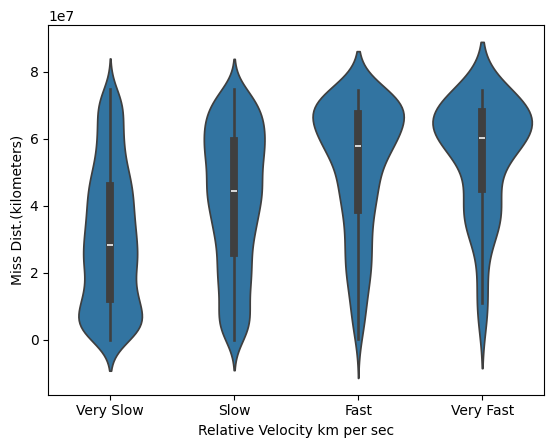

In [ ]:

sns.violinplot(data=df,x='Relative Velocity km per sec',y='Miss Dist.(kilometers)')
#we can use the gap in

In [ ]:
#filling distance values with categorical velcoity based on above curve
nan=df['Miss Dist.(kilometers)'].isnull()
for velocity in ['Very Slow', 'Slow', 'Fast', 'Very Fast']:
    median=df.loc[df['Relative Velocity km per sec']==velocity,'Miss Dist.(kilometers)'].median()
    if not pd.isna(median):
        df.loc[nan & (df['Relative Velocity km per sec']==velocity),'Miss Dist.(kilometers)']=median

nan=df['Miss Dist.(miles)'].isnull()
for velocity in ['Very Slow', 'Slow', 'Fast', 'Very Fast']:
    median=df.loc[df['Relative Velocity km per sec']==velocity,'Miss Dist.(miles)'].median()
    if not pd.isna(median):
        df.loc[nan & (df['Relative Velocity km per sec']==velocity),'Miss Dist.(miles)']=median

nan=df['Miss Dist.(lunar)'].isnull()
for velocity in ['Very Slow', 'Slow', 'Fast', 'Very Fast']:
    median=df.loc[df['Relative Velocity km per sec']==velocity,'Miss Dist.(lunar)'].median()
    if not pd.isna(median):
        df.loc[nan & (df['Relative Velocity km per sec']==velocity),'Miss Dist.(lunar)']=median

nan=df['Miss Dist.(Astronomical)'].isnull()
for velocity in ['Very Slow', 'Slow', 'Fast', 'Very Fast']:
    median=df.loc[df['Relative Velocity km per sec']==velocity,'Miss Dist.(Astronomical)'].median()
    if not pd.isna(median):
        df.loc[nan & (df['Relative Velocity km per sec']==velocity),'Miss Dist.(Astronomical)']=median


In [ ]:
#filling out the Nan values of categorical veloity with distance col.(based on statistical analysis)

a=df.loc[df['Relative Velocity km per sec']=='Very Slow','Miss Dist.(kilometers)'].median()
b=df.loc[df['Relative Velocity km per sec']=='Slow','Miss Dist.(kilometers)'].median()
c=df.loc[df['Relative Velocity km per sec']=='Fast','Miss Dist.(kilometers)'].median()
nan=df['Relative Velocity km per sec'].isnull()
for index, row in df[nan].iterrows():
  if row['Miss Dist.(kilometers)']<=a:
    df.at[index,'Relative Velocity km per sec']='Very Slow'
  elif a<row['Miss Dist.(kilometers)']<=b:
    df.at[index,'Relative Velocity km per sec']='Slow'
  elif b<row['Miss Dist.(kilometers)']<=c:
    df.at[index,'Relative Velocity km per sec']='Fast'
  else:
    df.at[index,'Relative Velocity km per sec']='Very Fast'

In [ ]:
encoder = LabelEncoder()
df['Relative Velocity km per sec'] = encoder.fit_transform(df['Relative Velocity km per sec'])

imputer = IterativeImputer(random_state=42)
df_train = df.loc[:, ['Miss Dist.(kilometers)','Miss Dist.(miles)','Relative Velocity km per sec','Relative Velocity km per hr','eccentricity','inclination']]
df_train.head()
imputer.fit(df_train)
df_imputed = imputer.transform(df_train)
df_imputed[:10]
df.loc[:, ['Miss Dist.(kilometers)','Miss Dist.(miles)','Relative Velocity km per sec','Relative Velocity km per hr','eccentricity','inclination']] = df_imputed

df['Relative Velocity km per sec'] = encoder.inverse_transform(df['Relative Velocity km per sec'].astype(int))

In [ ]:
#finding closest distance by taking average in AU
km_to_lunar=round(df['Miss Dist.(kilometers)'][0]/df['Miss Dist.(lunar)'][0], 6)
for index,row in df.iterrows():
  if pd.isna(row['Miss Dist.(lunar)']):
    if pd.notna(row['Miss Dist.(kilometers)']):
      df.at[index, 'Miss Dist.(lunar)']=round(row['Miss Dist.(kilometers)']/km_to_lunar, 6)

df['Closest Dist']=(df['Miss Dist.(Astronomical)']
                    +(0.00257*df['Miss Dist.(lunar)'])
                    +(df['Miss Dist.(kilometers)']/149597870.7)
                    +df['Miss Dist.(miles)']/92955807.3)/4

In [ ]:
df.drop(['Miles per hour','Miss Dist.(Astronomical)','Miss Dist.(miles)','Miss Dist.(kilometers)','Miss Dist.(lunar)'],axis=1,inplace=True)
df.isnull().sum()

Name                               0
Epoch Date Close Approach          0
Relative Velocity km per sec       0
Relative Velocity km per hr        0
Jupiter Tisserand Invariant        0
Epoch Osculation                1526
Semi Major Axis                    0
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                      0
Perihelion Time                 1564
Mean Anomaly                     918
Mean Motion                        0
approach_year                      0
approach_month                     0
approach_day                       0
Orbital Period                   530
Orbit Uncertainity              1766
Hazardous                          0
datetime                           0
Time Till Approach                 0
eccentricity                       0
inclination                        0
Closest Dist                       0
dtype: int64


### **Handling Mean Anomaly ,Epoch Osculation, Perhillion time**




*   Main relation used here to fill values initially is:
$$
(Perhillion\,\,Time - Epoch\,\,Osculation)= \frac{Mean\,\,Anomaly}{Mean\,\,Motion}
$$
Since we have already dealt with NaN values of mean motion this equation would be helpful to simulate the values of other three columns

*   NAYANDEEP PLEEJ WRITE WHAT U DID FOR EPOCH FILLING VALUES AFTER USING THE FORMULA INITIALLY



*   Since there was pretty good linear plot between Perhillion Time and Epoch Osculation of the raw data(shown below) we are putting in a linear regression model to impute Perhillion Time

*   After we are done dealing with Perhilion Time and EPoch Osculation ,we can usse the bove relation to fill the rest of the values of mean anomaly.

* since we have already dealt with mean motion, we can use it to find numerical value of Orbital period with the given relation:
$$
Orbital\,\,Period=\frac{360}{Mean Motion}
$$

*  After creating a Numerical Orbital Period column with above formula we can use it derive statistical inferences and use those inferences to deal with NaN values in categorical Orbital Period







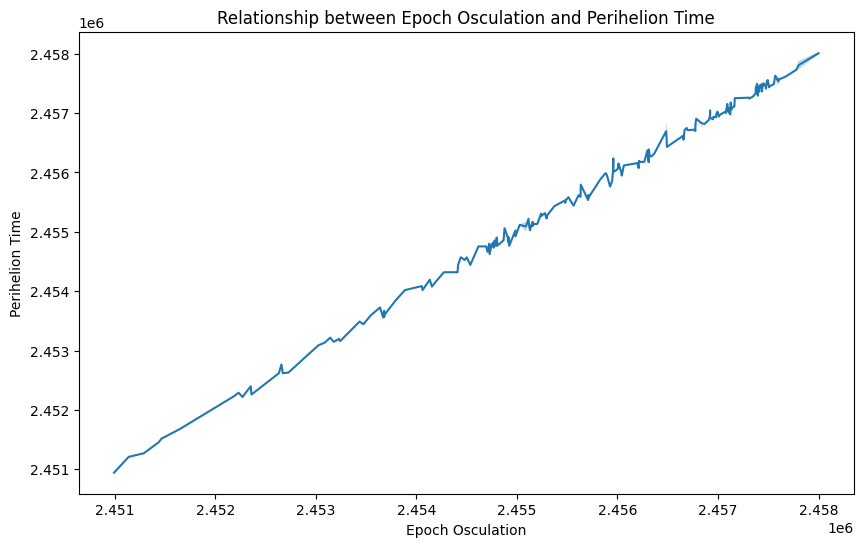

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch Osculation', y='Perihelion Time', data=df)
plt.xlabel('Epoch Osculation')
plt.ylabel('Perihelion Time')
plt.title('Relationship between Epoch Osculation and Perihelion Time')
plt.show()

In [ ]:
df.loc[df['Mean Anomaly']<0,'Mean Anomaly'].sum()

0.0

In [ ]:
nan=df['Epoch Osculation'].isnull()
df.loc[nan, 'Epoch Osculation']=df.loc[nan,'Perihelion Time']-(df.loc[nan,'Mean Anomaly']/df.loc[nan,'Mean Motion'])
nan=df['Perihelion Time'].isnull()
df.loc[nan,'Perihelion Time']=df.loc[nan,'Epoch Osculation']+(df.loc[nan,'Mean Anomaly']/df.loc[nan,'Mean Motion'])
nan=df['Mean Anomaly'].isnull()
df.loc[nan,'Mean Anomaly']=np.abs((df.loc[nan,'Perihelion Time']-df.loc[nan,'Epoch Osculation'])*df.loc[nan,'Mean Motion'])

In [ ]:
for i in df[df['Epoch Osculation'].isnull()].index:
    before = df.loc[:i-1, 'Epoch Osculation'].last_valid_index()
    after = df.loc[i+1:, 'Epoch Osculation'].first_valid_index()

    if before is not None and after is not None:
        df.loc[i, 'Epoch Osculation'] = (pd.to_numeric(df.loc[before, 'Epoch Osculation']) + pd.to_numeric(df.loc[after, 'Epoch Osculation'])) / 2

df.at[0, 'Epoch Osculation'] = df.at[1, 'Epoch Osculation']


In [ ]:
model = LinearRegression()

df_notna = df[df['Perihelion Time'].notna() & df['Epoch Osculation'].notna()]
X = df_notna[['Epoch Osculation']]
y = df_notna['Perihelion Time']

model.fit(X, y)

df_null = df[df['Perihelion Time'].isnull() & df['Epoch Osculation'].notna()]
X_null = df_null[['Epoch Osculation']]
predictions = model.predict(X_null)

df.loc[df['Perihelion Time'].isnull() & df['Epoch Osculation'].notna(), 'Perihelion Time'] = predictions



model = LinearRegression()

df_notna = df[df['Perihelion Time'].notna() & df['Epoch Osculation'].notna()]
X = df_notna[['Perihelion Time']]
y = df_notna['Epoch Osculation']

model.fit(X, y)

df_null = df[df['Epoch Osculation'].isnull() & df['Perihelion Time'].notna()]
X_null = df_null[['Perihelion Time']]
predictions = model.predict(X_null)

df.loc[df['Epoch Osculation'].isnull() & df['Perihelion Time'].notna(), 'Epoch Osculation'] = predictions

In [ ]:
df_anomaly = df[df["Mean Anomaly"].isnull() & df['Epoch Osculation'].notna() & df['Perihelion Time'].notna() & df["Mean Motion"].notna()]
df_anomaly["Mean Anomaly"]=np.abs((df_anomaly["Perihelion Time"] - df_anomaly["Epoch Osculation"]))*df_anomaly["Mean Motion"]
df.loc[df["Mean Anomaly"].isnull() & df['Epoch Osculation'].notna() & df['Perihelion Time'].notna() & df["Mean Motion"].notna(), "Mean Anomaly"] = df_anomaly["Mean Anomaly"]

In [ ]:
#checking if any value<0
df.loc[df["Mean Motion"]<0,"Mean Motion"].sum()

0.0

In [ ]:
df.isnull().sum()

Name                               0
Epoch Date Close Approach          0
Relative Velocity km per sec       0
Relative Velocity km per hr        0
Jupiter Tisserand Invariant        0
Epoch Osculation                   0
Semi Major Axis                    0
Asc Node Longitude              1096
Perihelion Arg                  1134
Aphelion Dist                      0
Perihelion Time                    0
Mean Anomaly                       0
Mean Motion                        0
approach_year                      0
approach_month                     0
approach_day                       0
Orbital Period                   530
Orbit Uncertainity              1766
Hazardous                          0
datetime                           0
Time Till Approach                 0
eccentricity                       0
inclination                        0
Closest Dist                       0
dtype: int64

For Numerical version of Orbital Period, we can use two prospective formulas, one using Mean Motion, while the other making use of Semi Major Axis. So, to ensure optimal results, we will make features using both and compare the outputs from both.

In [ ]:
df['Orbital Period Num']=(360/df['Mean Motion'])

<Axes: xlabel='Orbital Period', ylabel='Orbital Period Num'>

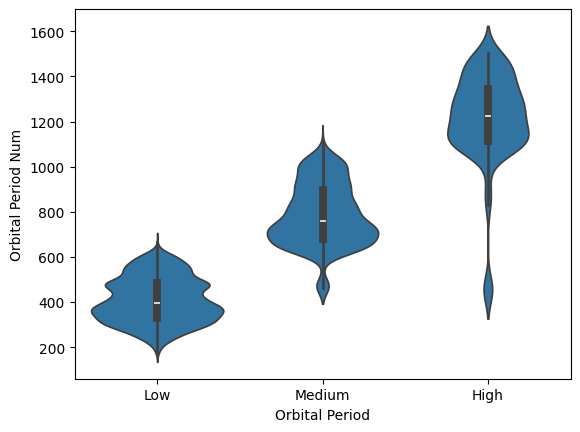

In [ ]:
sns.violinplot(data=df,x='Orbital Period',y='Orbital Period Num')

In [ ]:
#filling out the Nan values of categorical veloity with distance col.(based on statistical analysis)

a=df.loc[df['Orbital Period']=='Low','Orbital Period Num'].median()
b=df.loc[df['Orbital Period']=='Medium','Orbital Period Num'].median()
c=df.loc[df['Orbital Period']=='High','Orbital Period Num'].median()
nan=df['Orbital Period'].isnull()
for index, row in df[nan].iterrows():
  if row['Orbital Period Num']<=((b-a)/2):
    df.at[index,'Orbital Period']='Low'
  elif ((b-a)/2)<row['Orbital Period Num']<=c:
    df.at[index,'Orbital Period']='Medium'
  else:
    df.at[index,'Orbital Period']='High'

### **Handling Ascension Node longitude and Perhilion Argument**

In [ ]:
df_periarg = df[df['Perihelion Arg'].notna()]
X = df_periarg[['Perihelion Time', 'Semi Major Axis', 'Epoch Osculation', 'Mean Motion', 'Mean Anomaly']]
y = df_periarg['Perihelion Arg']

model = LinearRegression()
model.fit(X, y)
df_periarg = df[df['Perihelion Arg'].isna()]
y_pred = model.predict(df_periarg[['Perihelion Time', 'Semi Major Axis', 'Epoch Osculation', 'Mean Motion', 'Mean Anomaly']])
df.loc[df['Perihelion Arg'].isna(), 'Perihelion Arg'] = y_pred

In [ ]:
df_ascnode = df[df['Asc Node Longitude'].notna()]
X = df_ascnode[['Perihelion Time', 'Semi Major Axis', 'Epoch Osculation', 'Mean Motion', 'Mean Anomaly', 'Perihelion Arg']]
y = df_ascnode['Asc Node Longitude']

model = LinearRegression()
model.fit(X, y)

df_ascnode = df[df['Asc Node Longitude'].isna()]

y_pred = model.predict(df_ascnode[['Perihelion Time', 'Semi Major Axis', 'Epoch Osculation', 'Mean Motion', 'Mean Anomaly', 'Perihelion Arg']])
df.loc[df['Asc Node Longitude'].isna(), 'Asc Node Longitude'] = y_pred

### **Creating Heliocentric Distance feature and dealing with Orbital Uncertainity**


*   Created Helicentric Distance(distance between sun and asteroid) via approximating it with inclination angle and distance of closest approach with help of cosine law
$$
d_{\text sa}^2= 1 + d_{\text ea}^2 - 2\cdot1\cdot d_{\text ea}\cdot\cos{(i^\circ)}
$$


*   Founded **Δv (velocity)** and **Δr (distances)** which will be used directly to calculate uncertainity factor


*   uncertainity factor(u) is calculated as:\
First calculating longitude runoff(lr)
$$
lr = \left( \Delta \tau \cdot e + 10 \cdot \frac{\Delta P}{P} \right) \cdot 3600 \cdot 3 \cdot \frac{k_o}{P}
$$
Where:
          1.   Δτ=Unncertainity in Perhilion Time in days
          2.   ΔP=Uncertainity in Orbital Period in days
          3.   P=Perhilion Time in Years
          4.   e=Eccentricity of orbit
          5.   ko=0.98560766860142



$$
U = \min \left\{ 9, \max \left\{ 0, \left\lfloor 9 \cdot \frac{\log(lr)}{\log(648000)} \right\rfloor + 1 \right\} \right\}
$$



*    The Δτ and ΔP are calculated via basic calculus error analysis, which eventually returns:
$$
\Delta \tau= \frac{\Delta P}{P}\cdot\left| \text{P} - \text{Epoch Osculation} \right|
$$

and
$$
\frac{\Delta P}{P}=\frac{3}{2}\cdot\frac{\Delta a}{a}
$$


Where
$$
\frac{\Delta a}{a} = \frac{\left( \frac{2}{r^2} \cdot \Delta r + \frac{2v}{\mu} \cdot \Delta v \right)}{\left( \frac{2}{r} - \frac{v^2}{\mu} \right)}
$$

*  This Uncertainity Factor is then used to replace Orbital Uncertainity column as this factor is categorical in nature

In [ ]:
'''finding helicoentric distance of asteroid by cosine law'''
d_EA=df['Closest Dist'].values # Closest distance to Earth in AU
i=df['inclination'].values   # Inclination in degrees
a=df['Semi Major Axis'].values # Semi-major axis in AU

#calculate d_SA using the Law of Cosines
#convert inclination to radians
i_rad = np.radians(i)

#calculate distance from Sun (d_SA) using the Law of Cosines
d_SA=np.sqrt(1+d_EA**2 - 2*d_EA*np.cos(i_rad))

df['heliocentric distance']=d_SA

In [ ]:
pi=math.pi
mu=1.327e20  #in si unit
#convert distances from AU to meters
d_SA_m=d_SA*1.496e11  #convert d_SA to meters
d_EA_m=d_EA*1.496e11  #convert d_EA to meters
a_m=a*1.496e11  #convert semi-major axis to meters

'''velocity error calculation'''
#calculate velocity using the vis-viva equation
velocity=np.sqrt(mu * (2 / d_SA_m - 1 / a_m))  # in si unit
v_th = velocity * 3.6 #km/hr
v_th=np.abs(v_th-107000)/3.6 #final theorotca velocity in m/s
#finding error
v_obs=df['Relative Velocity km per hr'].values
v_obs=v_obs/3.6 #vel in m/s
del_v=np.abs(v_th-v_obs)#in m/s

'''distance error calculation'''
d_th_inv=((v_obs**2)/mu)+(1/a_m)
d_th=2*(1/d_th_inv)
del_d=np.abs(d_th-d_SA_m) #in m

In [ ]:
'''
 calculation of uncertainity orbital perimeter
 '''
mu=1.327e20 #SI
r=d_SA_m #SI
v=v_obs  #SI
del_r=del_d

dem=2/r
dem=dem-(v**2)/mu
num=(2/(r**2))*del_r
num=num+(2*v/mu)*del_v

#a is semi major axis ,therefore error_a is da/a in terms of calculus error analysis
error_a=num/dem

#p is orbital period,error_p is dp/p(dimensionless)
error_p=1.5*error_a

#tau is perhillion time in days , del_tau is uncertainity in tau
hmm=np.abs(df['Perihelion Time']-df['Epoch Osculation'])
hmm=hmm.values
del_tau=error_p*hmm

'''
uncertainity parameter calculation has two steps one would be to calculate longitudanal runoff
'''
p=df['Orbital Period Num'].values #in days
#p=p/365.35 #in years
e=df['eccentricity'].values
lr=(del_tau*e)+(error_p*10)
lr=lr*3600*3
lr=lr*0.01720209895*180/pi
lr=lr/p
u=np.log(lr)*1.48769
u=np.floor(u)-8
u=np.minimum(9,u)
df['Uncertainity Parameter']=u

In [ ]:
df['Uncertainity Parameter'].value_counts()

Uncertainity Parameter
3.0    1283
4.0    1160
2.0     782
5.0     700
6.0     285
1.0     211
7.0      81
8.0      16
9.0       6
0.0       6
Name: count, dtype: int64

In [ ]:
category_mapping = {
    0:'low',1:'low',2:'low',3:'low',
    4:'medium', 5:'medium',
    6:'high',7:'high',8:'high',9: 'high'}
df['Uncertainity Parameter']=df['Uncertainity Parameter'].map(category_mapping)
df.drop(['Orbit Uncertainity'],axis=1,inplace=True)

In [ ]:
df['Uncertainity Parameter'].value_counts()

Uncertainity Parameter
low       2282
medium    1860
high       388
Name: count, dtype: int64

In [ ]:
df.head()

Name  Epoch Date Close Approach Relative Velocity km per sec  \
0  3703080                  788947200                    Very Slow   
1  3723955                  788947200                         Slow   
2  2446862                  789552000                    Very Slow   
3  3092506                  790156800                    Very Slow   
4  3514799                  790156800                    Very Slow   

   Relative Velocity km per hr  Jupiter Tisserand Invariant  Epoch Osculation  \
0                 22017.003799                     4.577380         2458000.5   
1                 65210.346095                     5.481271         2458000.5   
2                 27326.560182                     4.557000         2458000.5   
3                 40225.948191                     5.093000         2458000.5   
4                 35426.991794                     5.154000         2458000.5   

   Semi Major Axis  Asc Node Longitude  Perihelion Arg  Aphelion Dist  \
0         1.407011          314.373913       57.257470       2.005764   
1         1.107776          136.717242      186.068040       1.497352   
2         1.458824          259.475979      248.415038       1.966857   
3         1.255919           57.173266      183.238695       1.527904   
4         1.225615           84.629307      158.263596       1.536128   

   Perihelion Time  Mean Anomaly  Mean Motion  approach_year  approach_month  \
0     2.458114e+06    264.837533     0.590551         1995.0             1.0   
1     2.457795e+06    173.741112     0.845330         1995.0             1.0   
2     2.458120e+06     67.107614     0.559381         1995.0             1.0   
3     2.457902e+06     68.741007     0.700277         1995.0             1.0   
4     2.457814e+06    135.144685     0.726409         1995.0             1.0   

   approach_day Orbital Period  Hazardous            datetime  \
0           1.0            Low       True 1995-01-01 08:00:00   
1           1.0            Low      False 1995-01-01 08:00:00   
2           8.0         Medium       True 1995-01-08 08:00:00   
3          15.0            Low      False 1995-01-15 08:00:00   
4          15.0         Medium       True 1995-01-15 08:00:00   

   Time Till Approach  eccentricity  inclination  Closest Dist  \
0           939657600      0.425549    15.766654      0.419454   
1           939657600      0.351674    15.506634      0.382989   
2           939052800      0.348248     1.348071      0.050953   
3           938448000      0.216563     6.786836      0.261326   
4           938448000      0.253353    12.308714      0.407805   

   Orbital Period Num  heliocentric distance Uncertainity Parameter  
0          609.599786               0.607121                 medium  
1          425.869294               0.639207                 medium  
2          643.568073               0.949062                    low  
3          514.082140               0.741149                    low  
4          495.588461               0.607819                 medium

### **MOREEEE FEATURES!!!!!!!!!!!!**
* Features Engineered till now:-
       1. Eccentricity
       2. Inclination angle
       3. Closest Distance
       4. Orbital Period Numerical
       5. Heliocentric Distance
       6. Uncertainity (created it from scratch with relevance of the current data)

* Creating Suggested Features under this section:-
         1. Specific Angular Momnetum
         2. Specific Energy
         3. Escape velocity
         4. Velocity at Perihelion
         5. Velocity at Aphelion
         6. Synnodic Period
         
* Additional Significant Feature based on theorotical knowledge:-

In [ ]:
#Specifc ang momentum in si unit
df['Ang Momentum Specific']=np.sqrt(mu*a_m*(1-(df['eccentricity']**2)))

#specific energy in Si unit
df['Specific Energy']=(v_obs**2)/2 - (mu/d_SA_m)
df['Specific Energy']=np.abs(df['Specific Energy'])
# average orbital velocity in km/hr
df['Orbital Vel Avg']=(2*pi/360)*(df['Mean Motion']/24)*(a_m/1000)

#escape velocity in km/hr
df['Escape Vel']=np.sqrt(2*mu/d_SA_m) #si unit
df['Escape Vel']=df['Escape Vel']*3.6 #converting to km/hr

#velocity at aphelion
aph=(df['Aphelion Dist']*1.496e11).values
df['Aphelion Velocity']=np.sqrt(mu*(2/aph) - mu*(1/a_m))
df['Aphelion Velocity']=df['Aphelion Velocity']*3.6

#velocity at perihilion
peri=2*a_m - aph
df['Perihilion Velocity']=np.sqrt(mu*(2/peri) - mu*(1/a_m))
df['Perihilion Velocity']=df['Perihilion Velocity']*3.6

#Synodic Period
s=np.abs(1/df['Orbital Period Num'] - 1/365.25)
df['Synodic Period']=1/s

In [ ]:
def solve_keplers_equation(M, e, tol=1e-6, max_iter=100):
    E = M  # Initial guess: E0 = M
    for _ in range(max_iter):
        delta=E-e*np.sin(E)-M
        if abs(delta) < tol:
            break
        E=E-delta/(1-e*np.cos(E))
    return E

# function to compute True Anomaly from Eccentric Anomaly and eccentricity
def true_anomaly(E, e):
    return 2 * np.arctan2(np.sqrt(1+e)*np.sin(E/2),np.sqrt(1-e)*np.cos(E / 2))

# Compute Eccentric Anomaly and True Anomaly
df['Eccentric Anomaly'] = df.apply(lambda row: solve_keplers_equation(row['Mean Anomaly'], row['eccentricity']), axis=1)
df['True Anomaly'] = df.apply(lambda row: true_anomaly(row['Eccentric Anomaly'], row['eccentricity']), axis=1)

In [ ]:
df.isnull().sum()

Name                            0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Semi Major Axis                 0
Asc Node Longitude              0
Perihelion Arg                  0
Aphelion Dist                   0
Perihelion Time                 0
Mean Anomaly                    0
Mean Motion                     0
approach_year                   0
approach_month                  0
approach_day                    0
Orbital Period                  0
Hazardous                       0
datetime                        0
Time Till Approach              0
eccentricity                    0
inclination                     0
Closest Dist                    0
Orbital Period Num              0
heliocentric distance           0
Uncertainity Parameter          0
Ang Momentum Specific           0
Specific Energy                 0
Orbital Vel Avg                 0
Escape Vel                      0
Aphelion Velocity               0
Perihilion Velocity             0
Synodic Period                  0
Eccentric Anomaly               0
True Anomaly                    0
dtype: int64

#GRAPHS AND PLOTS

In [ ]:
numeric_cols=df.select_dtypes(include='number').columns.tolist()

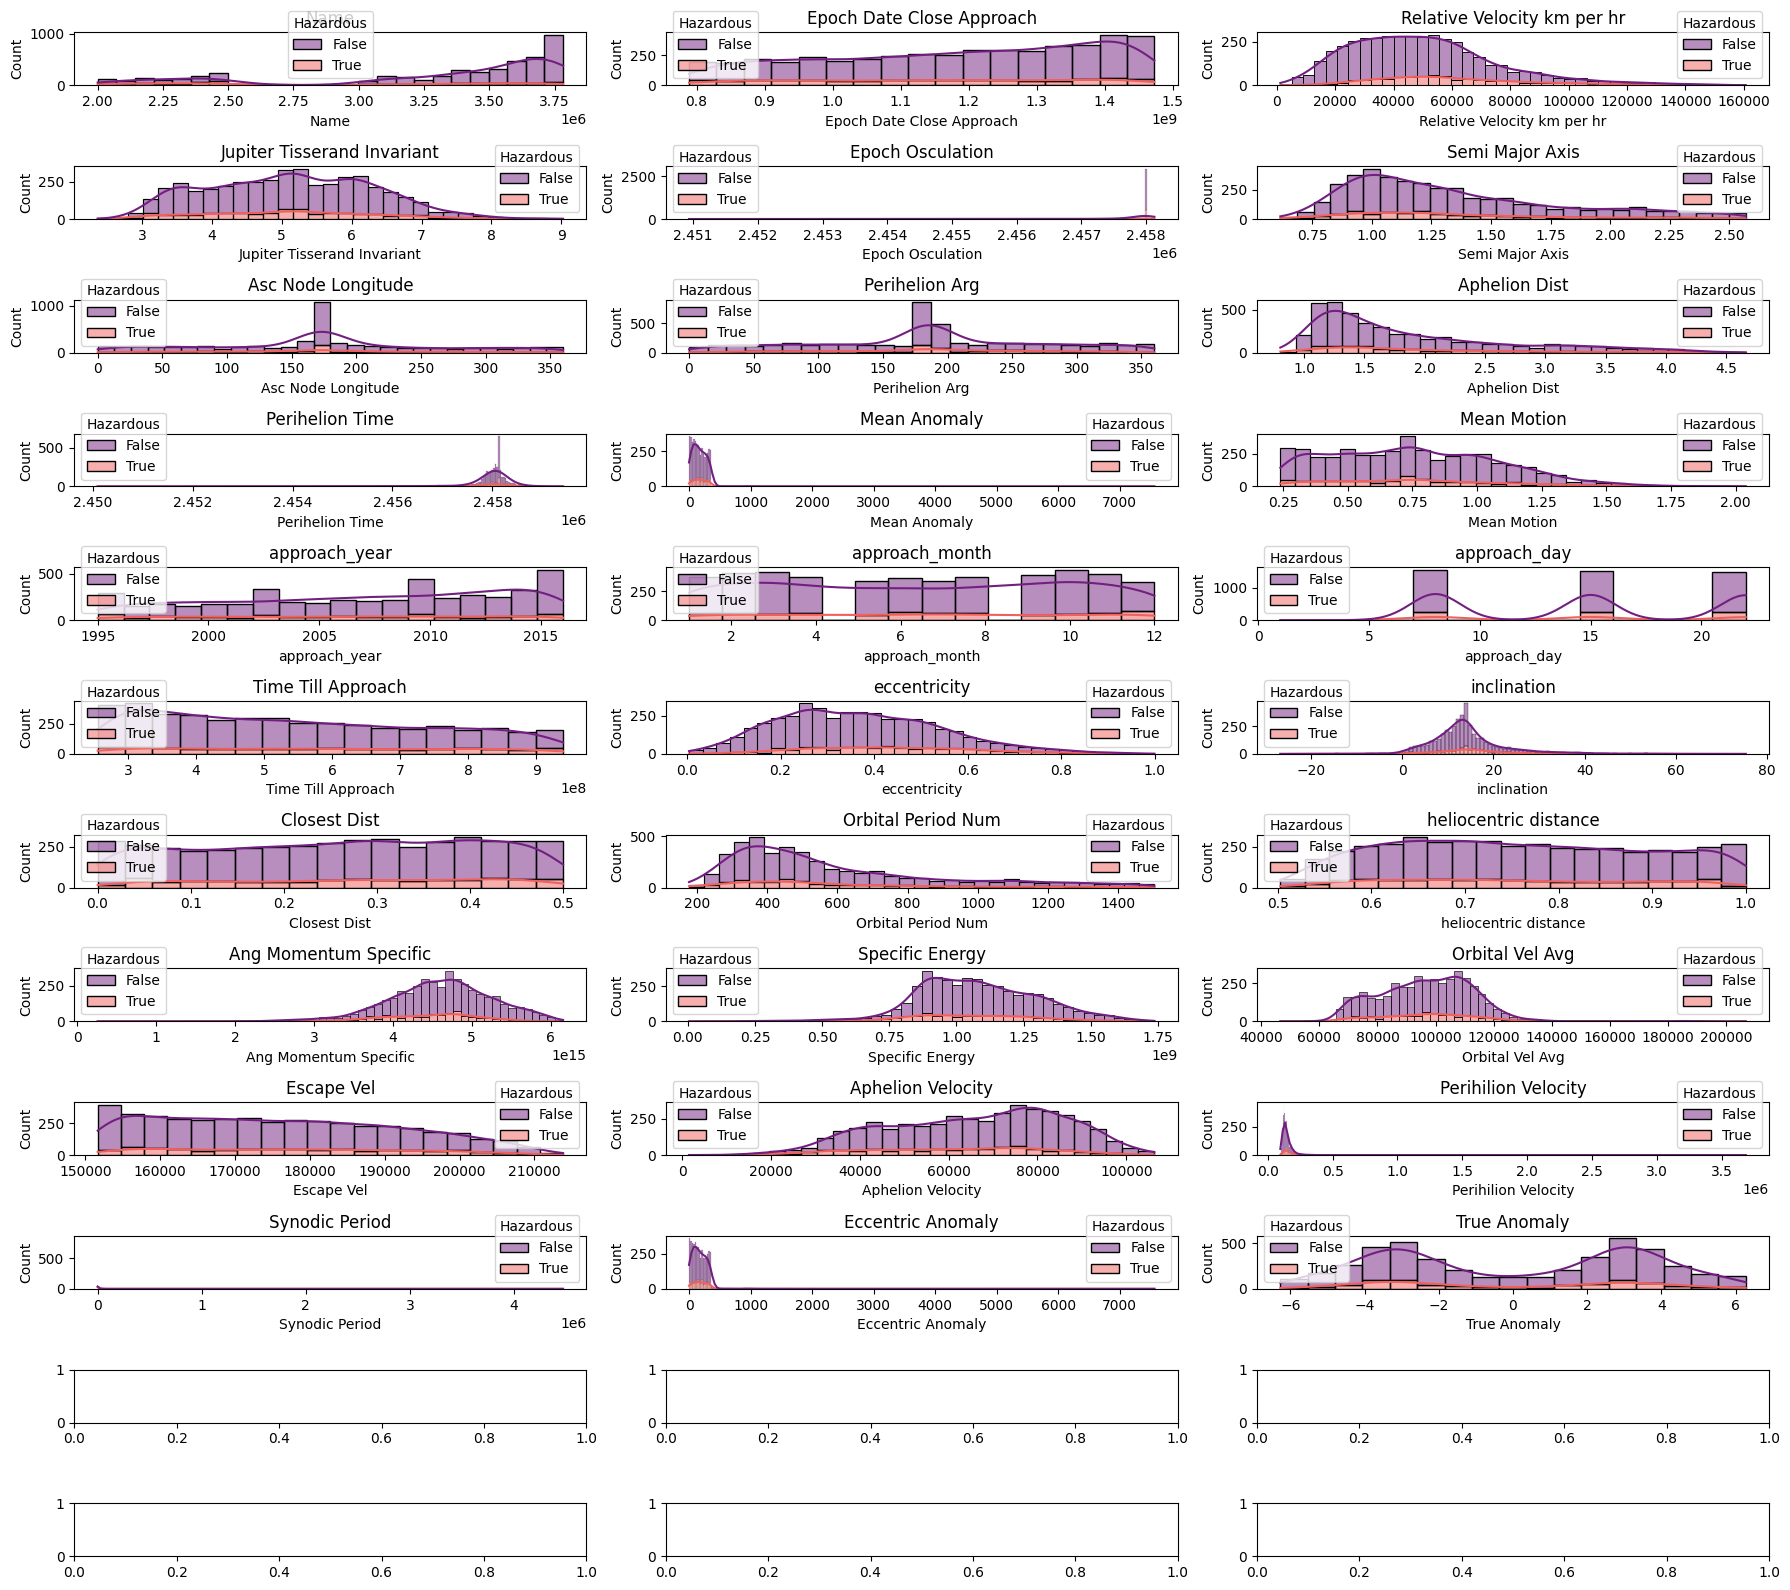

In [ ]:
axes, fig = plt.subplots(len(df.columns)//3 + (len(df.columns)%3>0), 3, figsize=(18, 16))

for i, column in enumerate(numeric_cols):
  sns.histplot(data=df, x=column, hue='Hazardous',multiple='stack', ax=fig[i//3, i%3], kde=True, palette='magma')
  fig[i//3, i%3].set_title(f'{column}')
  fig[i//3, i%3].set_xlabel(f'{column}')
  fig[i//3, i%3].set_ylabel('Count')

plt.tight_layout()
plt.show()

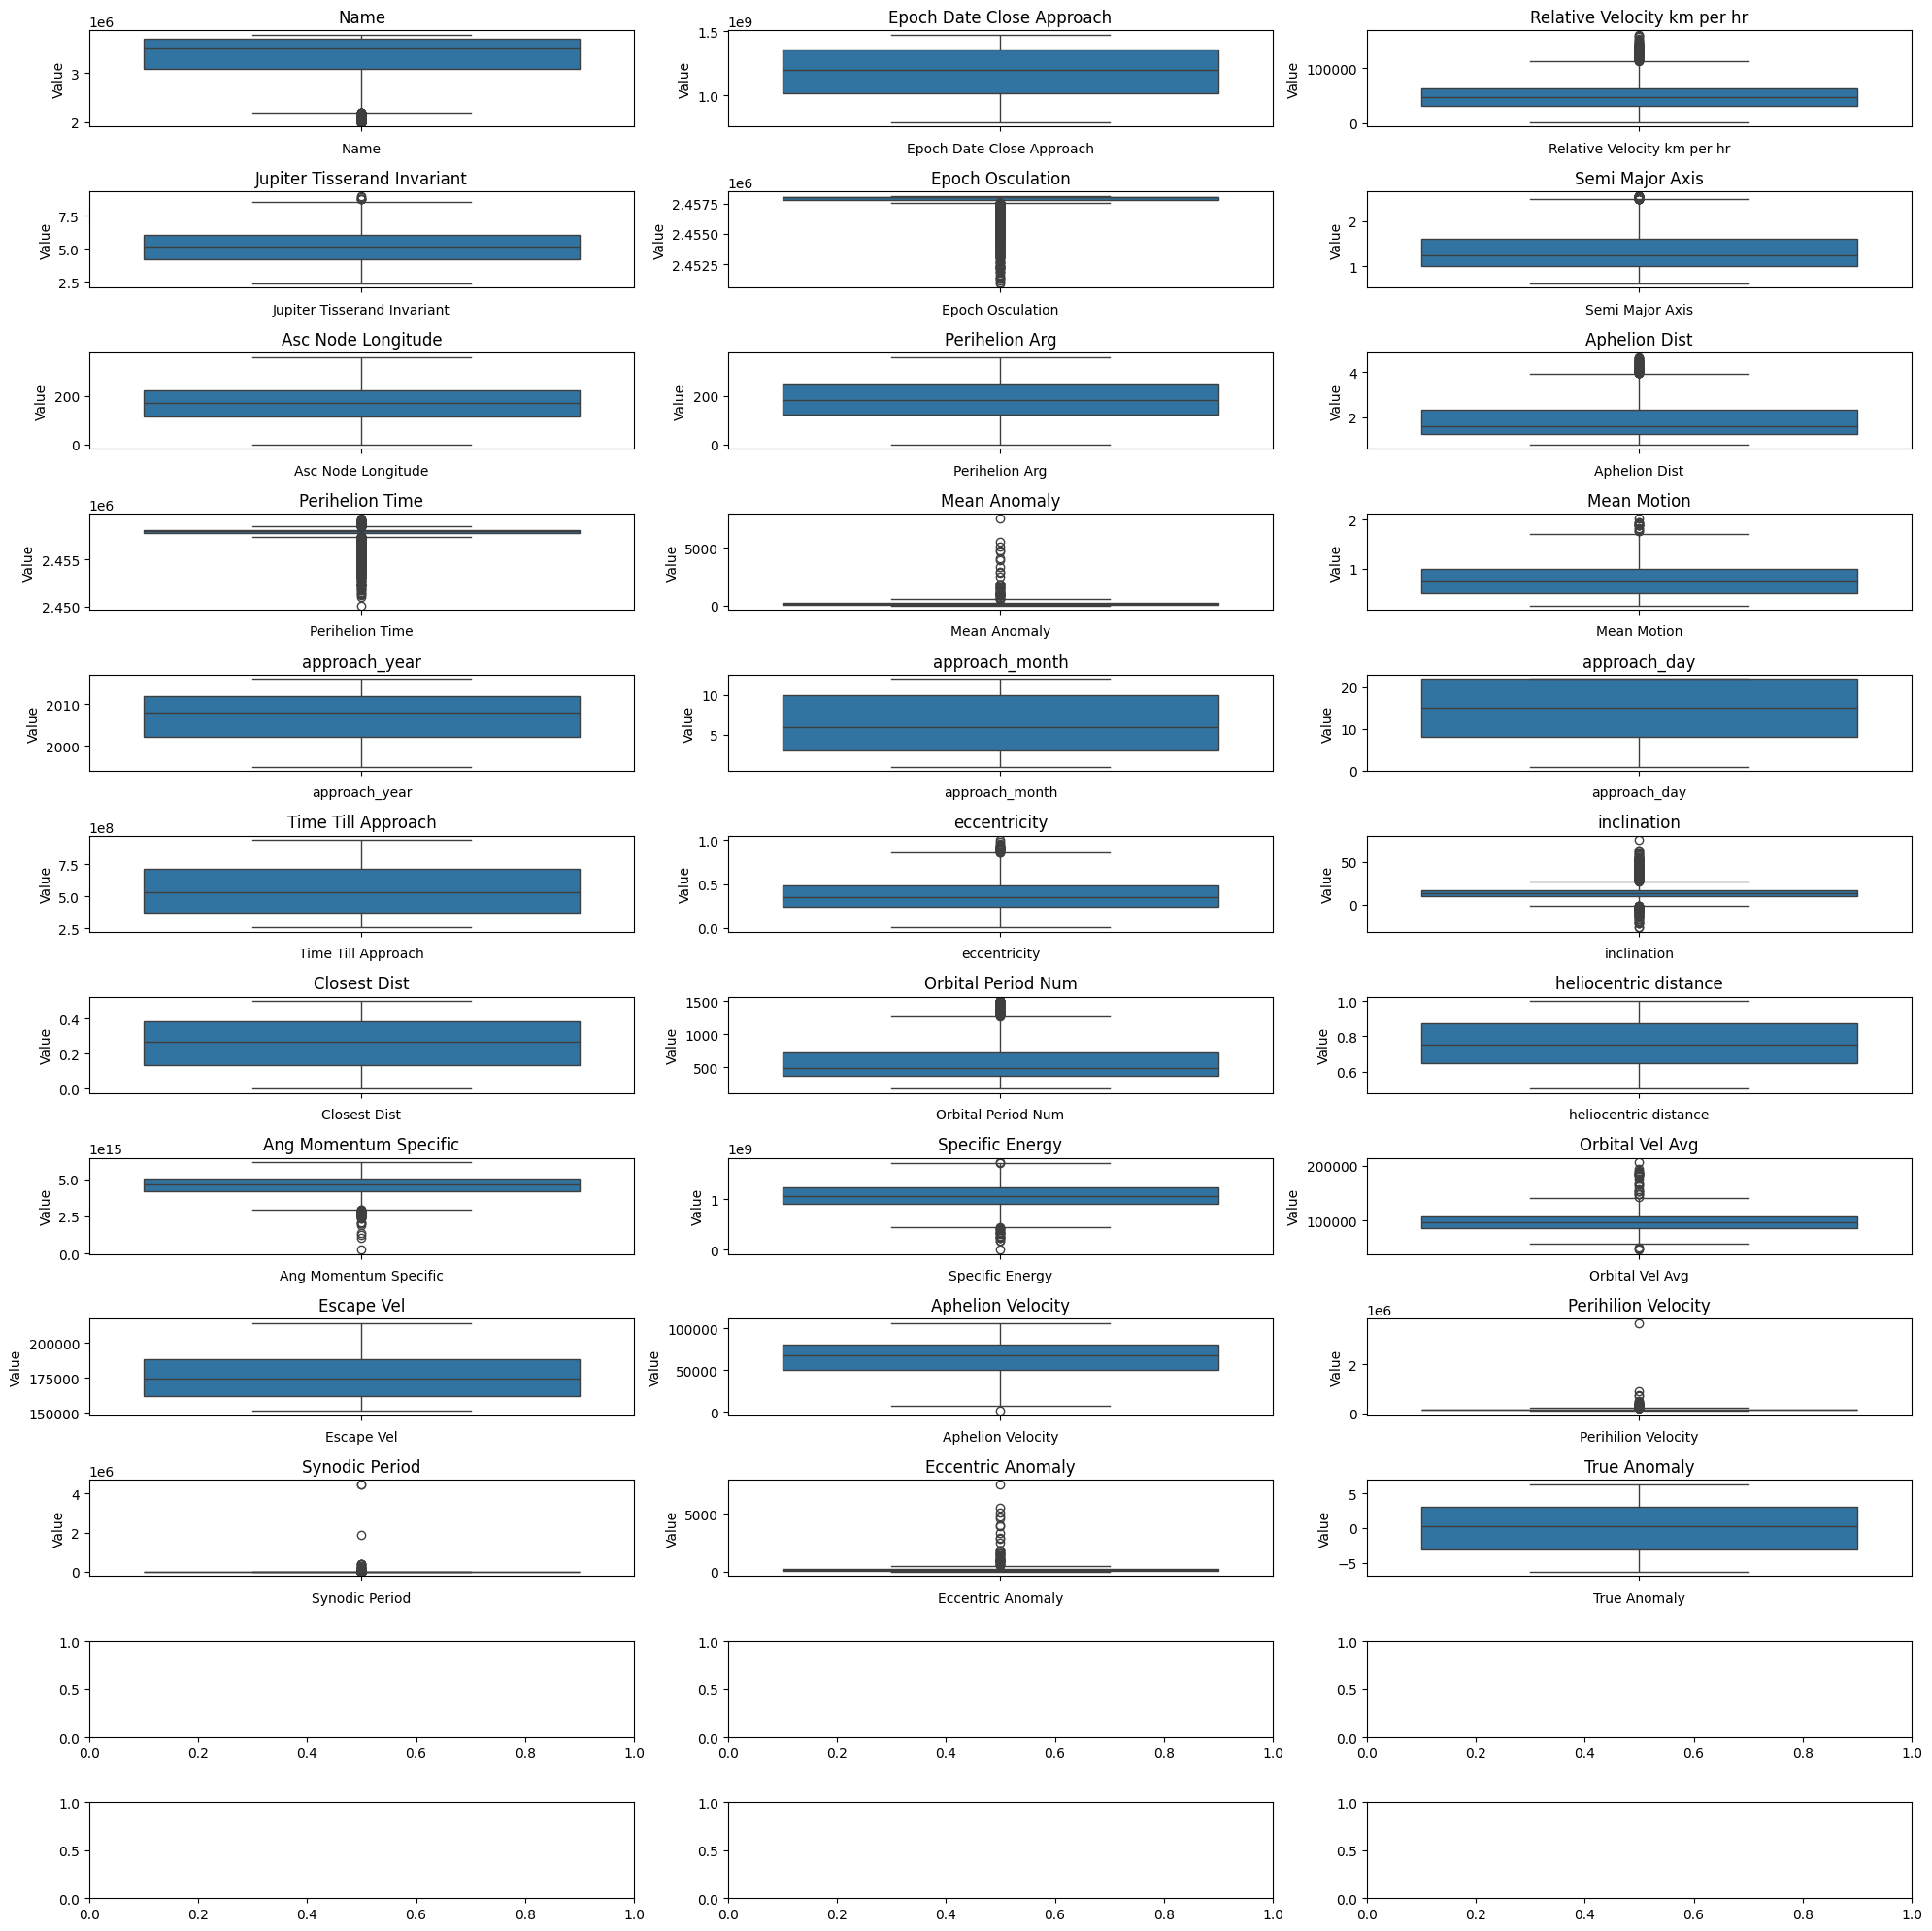

In [ ]:
axes, fig = plt.subplots(len(df.columns)//3 + (len(df.columns)%3>0), 3, figsize=(20, 20))

for i, column in enumerate(numeric_cols):
  sns.boxplot(data=df, y=column, ax=fig[i//3, i%3])
  fig[i//3, i%3].set_title(f'{column}')
  fig[i//3, i%3].set_xlabel(f'{column}')
  fig[i//3, i%3].set_ylabel('Value')

plt.tight_layout()
plt.show()

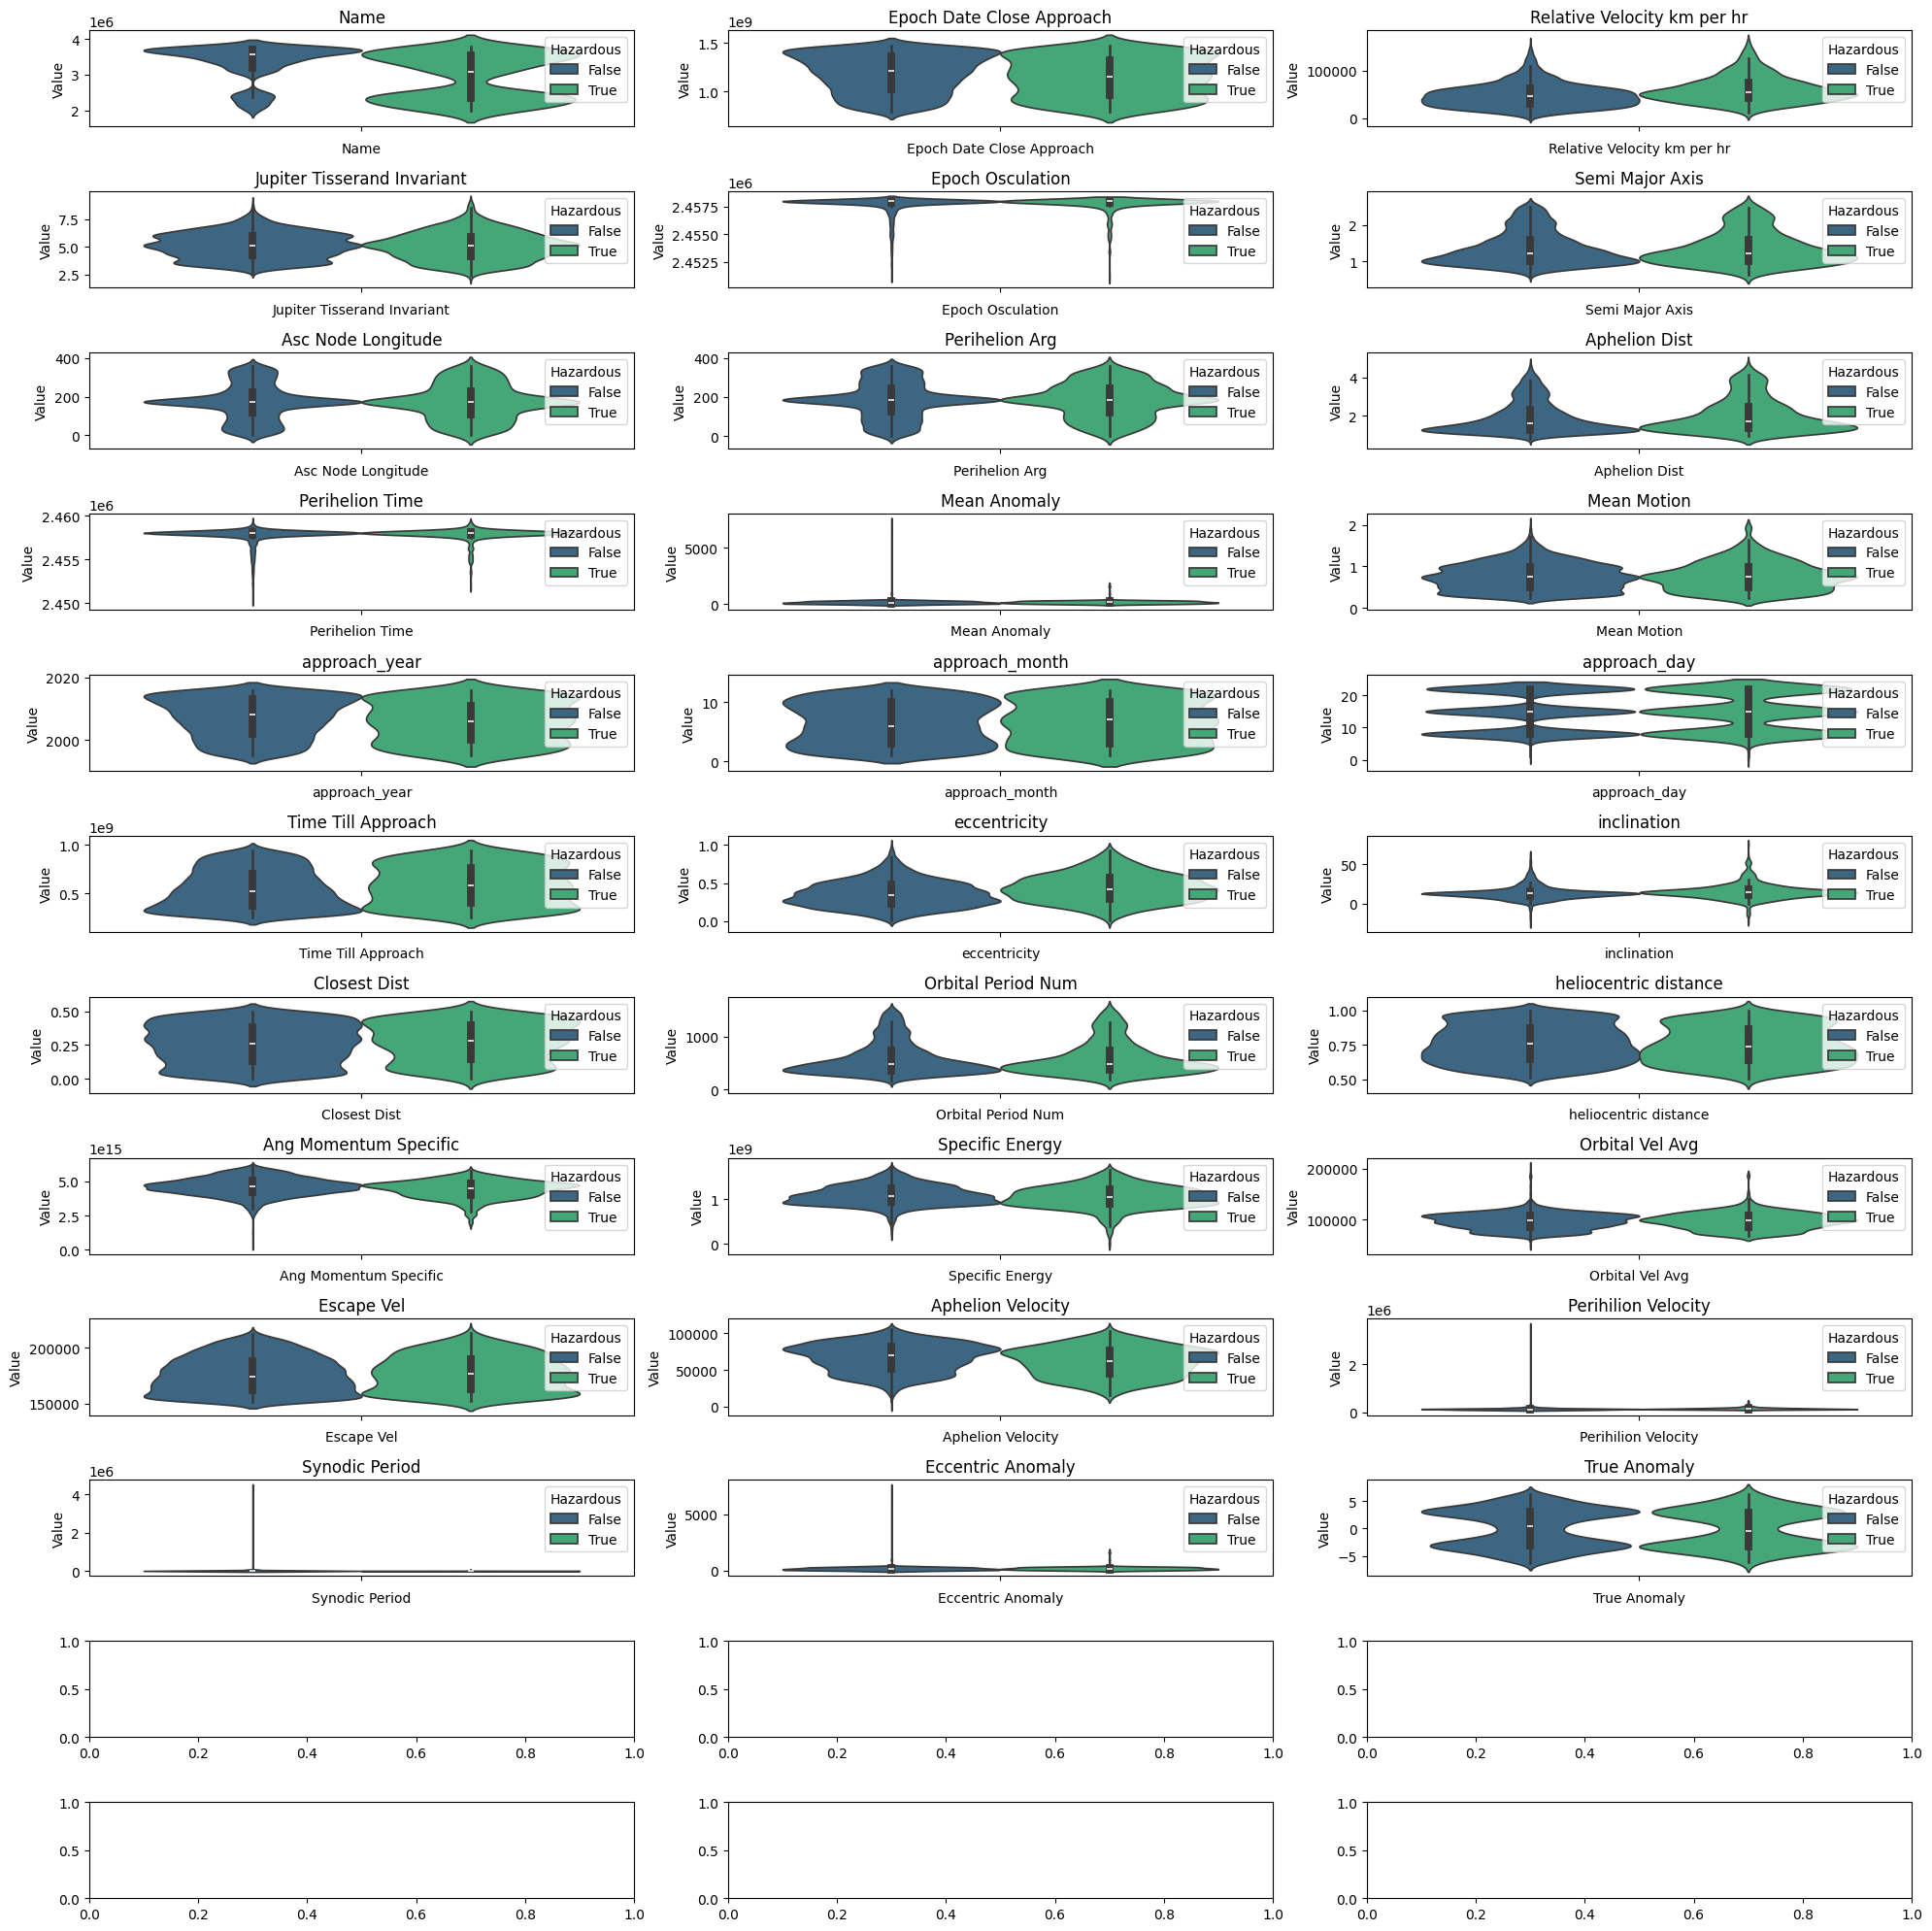

In [ ]:
axes, fig = plt.subplots(len(df.columns)//3 + (len(df.columns)%3>0), 3, figsize=(20,20))

for i, column in enumerate(numeric_cols):
  sns.violinplot(data=df, y=column, hue='Hazardous', ax=fig[i//3, i%3], density_norm='count', palette='viridis')
  fig[i//3, i%3].set_title(f'{column}')
  fig[i//3, i%3].set_xlabel(f'{column}')
  fig[i//3, i%3].set_ylabel('Value')

plt.tight_layout()
plt.show()

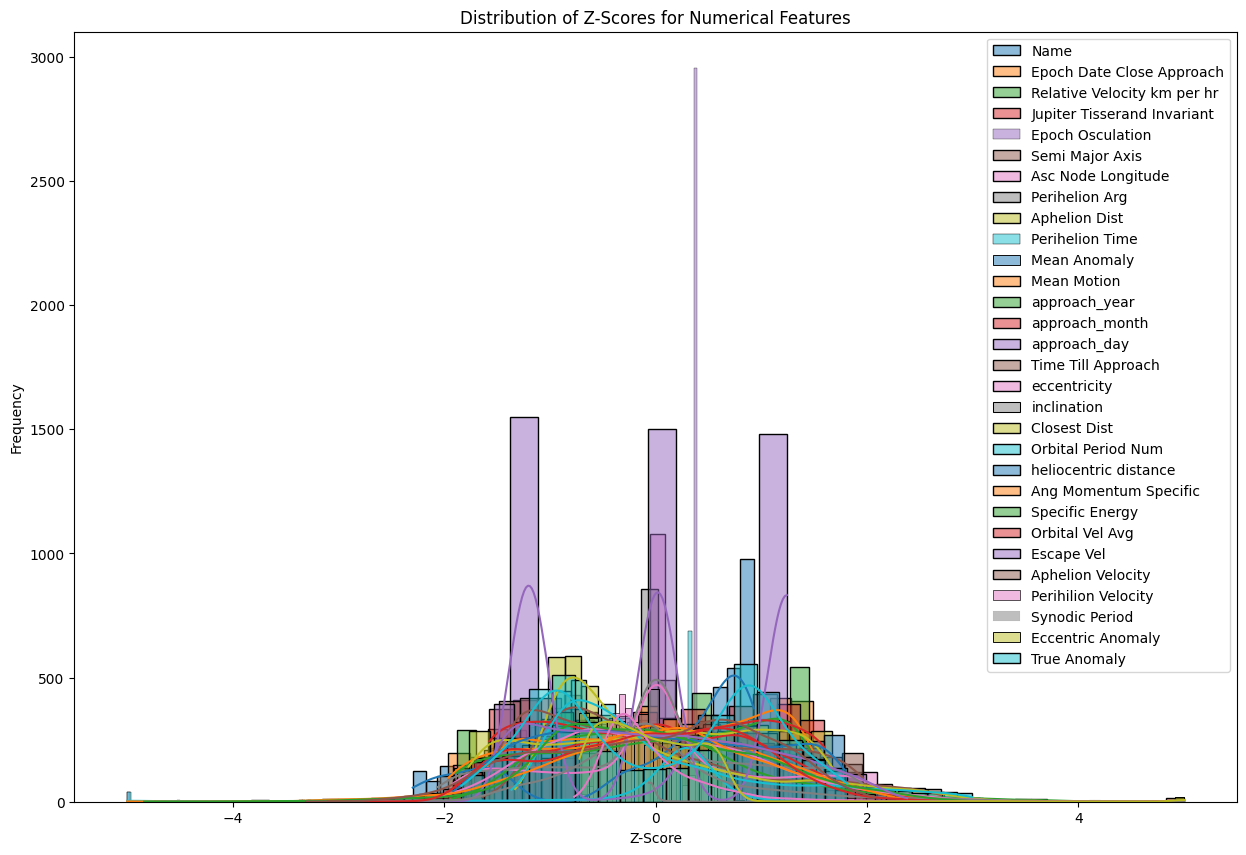

In [ ]:
df_zscore = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())
df_zscore = df_zscore.apply(lambda x: np.clip(x, -5, 5))

# Plotting the z-scores
plt.figure(figsize=(15, 10))  # Adjust figure size if needed
for col in numeric_cols:
    sns.histplot(df_zscore[col], kde=True, label=col)

plt.title('Distribution of Z-Scores for Numerical Features')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Handling Binned Values

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Relative Velocity km per sec', 'Orbital Period', 'Uncertainity Parameter']

In [ ]:
df[categorical_cols]

Relative Velocity km per sec Orbital Period Uncertainity Parameter
0                       Very Slow            Low                 medium
1                            Slow            Low                 medium
2                       Very Slow         Medium                    low
3                       Very Slow            Low                    low
4                       Very Slow         Medium                 medium
...                           ...            ...                    ...
4529                         Slow            Low                    low
4530                    Very Slow         Medium                    low
4531                    Very Slow         Medium                 medium
4532                    Very Slow         Medium                    low
4533                    Very Fast         Medium                 medium

[4530 rows x 3 columns]

In [ ]:
df[categorical_cols].nunique()

Relative Velocity km per sec    4
Orbital Period                  3
Uncertainity Parameter          3
dtype: int64

In [ ]:
vals = df['Relative Velocity km per sec'].unique()
encoder = OrdinalEncoder(categories=[vals.tolist()])
df['Relative Velocity km per sec'] = encoder.fit_transform(df[['Relative Velocity km per sec']])

In [ ]:
vals = df['Orbital Period'].unique()
encoder = OrdinalEncoder(categories=[vals.tolist()])
df['Orbital Period'] = encoder.fit_transform(df[['Orbital Period']])

In [ ]:
vals = df['Uncertainity Parameter'].unique()
encoder = OrdinalEncoder(categories=[vals.tolist()])
df['Uncertainity Parameter'] = encoder.fit_transform(df[['Uncertainity Parameter']])

In [ ]:
df.head()

Name  Epoch Date Close Approach  Relative Velocity km per sec  \
0  3703080                  788947200                           0.0   
1  3723955                  788947200                           1.0   
2  2446862                  789552000                           0.0   
3  3092506                  790156800                           0.0   
4  3514799                  790156800                           0.0   

   Relative Velocity km per hr  Jupiter Tisserand Invariant  Epoch Osculation  \
0                 22017.003799                     4.577380         2458000.5   
1                 65210.346095                     5.481271         2458000.5   
2                 27326.560182                     4.557000         2458000.5   
3                 40225.948191                     5.093000         2458000.5   
4                 35426.991794                     5.154000         2458000.5   

   Semi Major Axis  Asc Node Longitude  Perihelion Arg  Aphelion Dist  \
0         1.407011          314.373913       57.257470       2.005764   
1         1.107776          136.717242      186.068040       1.497352   
2         1.458824          259.475979      248.415038       1.966857   
3         1.255919           57.173266      183.238695       1.527904   
4         1.225615           84.629307      158.263596       1.536128   

   Perihelion Time  Mean Anomaly  Mean Motion  approach_year  approach_month  \
0     2.458114e+06    264.837533     0.590551         1995.0             1.0   
1     2.457795e+06    173.741112     0.845330         1995.0             1.0   
2     2.458120e+06     67.107614     0.559381         1995.0             1.0   
3     2.457902e+06     68.741007     0.700277         1995.0             1.0   
4     2.457814e+06    135.144685     0.726409         1995.0             1.0   

   approach_day  Orbital Period  Hazardous            datetime  \
0           1.0             0.0       True 1995-01-01 08:00:00   
1           1.0             0.0      False 1995-01-01 08:00:00   
2           8.0             1.0       True 1995-01-08 08:00:00   
3          15.0             0.0      False 1995-01-15 08:00:00   
4          15.0             1.0       True 1995-01-15 08:00:00   

   Time Till Approach  eccentricity  inclination  Closest Dist  \
0           939657600      0.425549    15.766654      0.419454   
1           939657600      0.351674    15.506634      0.382989   
2           939052800      0.348248     1.348071      0.050953   
3           938448000      0.216563     6.786836      0.261326   
4           938448000      0.253353    12.308714      0.407805   

   Orbital Period Num  heliocentric distance  Uncertainity Parameter  \
0          609.599786               0.607121                     0.0   
1          425.869294               0.639207                     0.0   
2          643.568073               0.949062                     1.0   
3          514.082140               0.741149                     1.0   
4          495.588461               0.607819                     0.0   

   Ang Momentum Specific  Specific Energy  Orbital Vel Avg     Escape Vel  \
0           4.782639e+15     1.442344e+09     90396.788190  194602.956686   
1           4.389953e+15     1.223650e+09    101876.924604  189655.973217   
2           5.044623e+15     9.058311e+08     88778.657504  155646.660120   
3           4.874739e+15     1.134406e+09     95681.776827  176130.411055   
4           4.771694e+15     1.410948e+09     96857.444965  194491.272392   

   Aphelion Velocity  Perihilion Velocity  Synodic Period  Eccentric Anomaly  \
0       57379.762744        142392.789005      911.219630         265.253651   
1       70551.586908        147090.833892     2565.994239         173.508883   
2       61720.140755        127677.561265      844.584888          66.841806   
3       76776.116947        119222.070460     1261.612588          68.642424   
4       74750.851909        125479.913352     1388.797167         135.133327   

 

In [ ]:
df['Hazardous'] = df['Hazardous'].astype(int)

# NORMALISATION,ENCODING AND BALANCING CLASSES

* Here we used Histplots to see if the data was Gaussian in nature or not, if it was Gaussian, we preferred to use Standard Scaler, while for other values we used Robust Scaler.


*  For categorical values, we used MinMAx Scaler as these values neither are Gaussian, and do not contain too many outliers either, so scaling them from 0 to 1 was the best method.






* Since one of the most famous Blancing technique is smoting, But as we know from various studies (most relevant one SMote or NOt to smote research paper), Most State of the art classifer like XGboost rarely has any boost in performance after smoting and Models like DNN might or might have a performance boost which becomes important in our case because we trained a DNN, so to handle imbalnces we used a weighted cost function rather then classical cross entropy function which efficiently deals with binary imbalnces by setting up weights at each class.

The columns which are showing a Gaussian Distribution as can be identified from the above plotted graphs are:

* Relative Velocity km per sec
* Jupiter Tisserand Invariant
* Semi Major Axis
* Asc Mode Longitude
* Perihelion Arg
* Aphelion Dist
* Mean Motion
* Orbital Period Num
* Eccentricity
* Specific Energy
* Inclination

THe Rest of the columns do not have a Gaussian Distribution, we for scaling them we will use MinMax Scaler or Robust Scaler, while for the Gaussian Columns we will use Standard Scaler.

In [ ]:
columns_to_scale = ['Relative Velocity km per hr', 'Jupiter Tisserand Invariant', 'Semi Major Axis', 'Asc Node Longitude', 'Perihelion Arg', 'Aphelion Dist', 'Mean Motion', 'Orbital Period Num','eccentricity', 'Specific Energy', 'inclination']

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df.index)

In [ ]:
df_scaled

Relative Velocity km per hr  Jupiter Tisserand Invariant  \
0                       -1.111307                    -0.467833   
1                        0.578458                     0.303699   
2                       -0.903592                    -0.485229   
3                       -0.398956                    -0.027717   
4                       -0.586695                     0.024351   
...                           ...                          ...   
4529                     1.147472                     0.026058   
4530                    -1.518418                     0.456085   
4531                    -0.959795                    -0.610703   
4532                    -0.373857                    -0.553514   
4533                     3.089957                    -0.868481   

      Semi Major Axis  Asc Node Longitude  Perihelion Arg  Aphelion Dist  \
0            0.118523            1.583899       -1.427188       0.129505   
1           -0.547147           -0.396247        0.011582      -0.488030   
2            0.233784            0.972011        0.707977       0.082247   
3           -0.217593           -1.282837       -0.020021      -0.450921   
4           -0.285006           -0.976815       -0.298984      -0.440932   
...               ...                 ...             ...            ...   
4529        -0.427793           -0.090113        1.020511      -0.386065   
4530        -0.619730            1.927765       -1.596368      -0.671709   
4531         0.388192           -1.507392       -0.070806       0.232682   
4532         0.295616           -0.094352       -0.052330      -0.135323   
4533         0.267645            0.171358        0.417807       0.790806   

      Mean Motion  Orbital Period Num  eccentricity  Specific Energy  \
0       -0.508695            0.056819      0.308782         1.620047   
1        0.274807           -0.546167     -0.111496         0.637387   
2       -0.604550            0.168299     -0.130987        -0.790667   
3       -0.171263           -0.256661     -0.880152         0.236387   
4       -0.090901           -0.317356     -0.670852         1.478976   
...           ...                 ...           ...              ...   
4529     0.096816           -0.443437     -0.055528        -1.636988   
4530     0.394088           -0.607485     -0.678307        -0.873345   
4531    -0.720435            0.320863     -0.018307        -0.732531   
4532    -0.652568            0.228950     -0.959874         0.081872   
4533    -0.631158            0.201483      2.041238        -1.886861   

      inclination  
0        0.180239  
1        0.150075  
2       -1.492377  
3       -0.861458  
4       -0.220897  
...           ...  
4529     2.946239  
4530    -0.015856  
4531    -1.442254  
4532     0.756462  
4533     2.456602  

[4530 rows x 11 columns]

In [ ]:
df = pd.concat([df.drop(columns=columns_to_scale), df_scaled], axis=1)

In [ ]:
columns_to_scale = ['Epoch Date Close Approach', 'Epoch Osculation',
       'Perihelion Time', 'Mean Anomaly', 'approach_year', 'approach_month',
       'approach_day', 'Time Till Approach', 'Closest Dist', 'heliocentric distance',
        'Ang Momentum Specific', 'Orbital Vel Avg',
       'Escape Vel', 'Aphelion Velocity', 'Perihilion Velocity',
       'Synodic Period', 'Eccentric Anomaly', 'True Anomaly']

In [ ]:
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df

Name  Epoch Date Close Approach  Relative Velocity km per sec  \
0     3703080                  -1.202146                           0.0   
1     3723955                  -1.202146                           1.0   
2     2446862                  -1.200379                           0.0   
3     3092506                  -1.198612                           0.0   
4     3514799                  -1.198612                           0.0   
...       ...                        ...                           ...   
4529  3759007                   0.797476                           1.0   
4530  3759295                   0.797476                           0.0   
4531  3759714                   0.797476                           0.0   
4532  3759720                   0.797476                           0.0   
4533  3772978                   0.797476                           3.0   

      Epoch Osculation  Perihelion Time  Mean Anomaly  approach_year  \
0             0.000000         0.252050      0.579630           -1.3   
1             0.000000        -0.902153      0.091230           -1.3   
2             0.000000         0.276005     -0.480469           -1.3   
3             0.000000        -0.513529     -0.471711           -1.3   
4             0.000000        -0.831624     -0.115698           -1.3   
...                ...              ...           ...            ...   
4529         -1.874641        -0.972164     -0.257111            0.8   
4530          0.000000         0.157099     -0.427318            0.8   
4531          0.000000         1.253672      0.250784            0.8   
4532          0.515156         0.883344     -0.292152            0.8   
4533          0.655199         0.993109     -0.275662            0.8   

      approach_month  approach_day  Orbital Period  Hazardous  \
0          -0.714286          -1.0             0.0          1   
1          -0.714286          -1.0             0.0          0   
2          -0.714286          -0.5             1.0          1   
3          -0.714286           0.0             0.0          0   
4          -0.714286           0.0             1.0          1   
...              ...           ...             ...        ...   
4529        0.428571          -0.5             0.0          0   
4530        0.428571          -0.5             1.0          0   
4531        0.428571          -0.5             1.0          0   
4532        0.428571          -0.5             1.0          0   
4533        0.428571          -0.5             1.0          0   

                datetime  Time Till Approach  Closest Dist  \
0    1995-01-01 08:00:00            1.202146      0.614078   
1    1995-01-01 08:00:00            1.202146      0.468092   
2    1995-01-08 08:00:00            1.200379     -0.861168   
3    1995-01-15 08:00:00            1.198612     -0.018968   
4    1995-01-15 08:00:00            1.198612      0.567440   
...                  ...                 ...           ...   
4529 2016-09-08 08:00:00           -0.797476     -0.643022   
4530 2016-09-08 08:00:00           -0.797476     -1.039254   
4531 2016-09-08 08:00:00           -0.797476     -0.820926   
4532 2016-09-08 08:00:00           -0.797476     -0.021305   
4533 2016-09-08 08:00:00           -0.797476      0.785768   

      heliocentric distance  Uncertainity Parameter  Ang Momentum Specific  \
0                 -0.643269                     0.0               0.179391   
1                 -0.501818                     0.0              -0.290618   
2                  0.864215                     1.0               0.492962   
3                 -0.052393                     1.0               0.289626   
4                 -0.640195                     0.0               0.166291   
...                     ...                     ...                    ...   
4529               0.741484                     1.0              -0.186462   
4530               1.061124                     1.0              -0.193875   
4531               0.819972

#Preparing Data for Model


*    In this section , We did feature selection via recursive shap value analysis


*   Dropped the inefficient features like Perhilion Time ,Asc Node Longitude and Specific Energy after looking at the loss plot given by Recursive Shap Value


*   Segregated the data into output and input

*   Train test sploit for model training and evalutaion





In [ ]:
from catboost import CatBoostClassifier, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

categorical_features = ['Orbital Period', 'Uncertainity Parameter','Relative Velocity km per sec']
df[categorical_features] = df[categorical_features].astype(str)
X = df.drop(columns=['Name','datetime','approach_year','approach_month','approach_day','Hazardous'])
y = df['Hazardous']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)
feature_names = ['F{}'.format(i) for i in range(train_X.shape[1])]

train_pool = Pool(train_X, train_y)
test_pool = Pool(test_X, test_y)

model = CatBoostClassifier(iterations=1000, random_seed=0)
summary = model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select='0-26',
    num_features_to_select=20,
    steps=3,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=True,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
categorical_features = ['Orbital Period', 'Uncertainity Parameter','Relative Velocity km per sec']
df[categorical_features] = df[categorical_features].astype(str)
X = df.drop(columns=['Name','datetime','approach_year','approach_month','approach_day','Hazardous','Asc Node Longitude','Perihelion Time'])
y = df['Hazardous']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)
feature_names = ['F{}'.format(i) for i in range(train_X.shape[1])]

train_pool = Pool(train_X, train_y)
test_pool = Pool(test_X, test_y)

model = CatBoostClassifier(iterations=1000, random_seed=0)
summary = model.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select='0-26',
    num_features_to_select=20,
    steps=3,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=True,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
pd.Series(y).value_counts()

Hazardous
0    3795
1     735
Name: count, dtype: int64

In [ ]:
y=y.values

In [ ]:
df.drop(['Name', 'datetime','approach_year','approach_month','approach_day','Hazardous','Perihelion Time','Asc Node Longitude','Specific Energy'],axis=1,inplace=True)

In [ ]:
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4530 entries, 0 to 4533
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Epoch Date Close Approach     4530 non-null   float64
 1   Relative Velocity km per sec  4530 non-null   float64
 2   Epoch Osculation              4530 non-null   float64
 3   Mean Anomaly                  4530 non-null   float64
 4   Orbital Period                4530 non-null   float64
 5   Time Till Approach            4530 non-null   float64
 6   Closest Dist                  4530 non-null   float64
 7   heliocentric distance         4530 non-null   float64
 8   Uncertainity Parameter        4530 non-null   float64
 9   Ang Momentum Specific         4530 non-null   float64
 10  Orbital Vel Avg               4530 non-null   float64
 11  Escape Vel                    4530 non-null   float64
 12  Aphelion Velocity             4530 non-null   float64
 13  Perihili

In [ ]:
x=df.values

In [ ]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.3,random_state=45)

# MODEL TUNING AND TRAINING


*   Defined a DNN with 4 relu layer , one drop out layer and output sigmoid layer

*   Interesting fact about this neural network is that it doesnt use conventional cross entropy loss function but uses a weighted cross entropy loss instead to handle the imbalances effectively.

*   Used Keras-Tuner to tune various hyper perameters including weights of loss function.

* After tuning, did the  k fold evaluation of the said model with tuned hyper perameter

* Trained the model finally




In [ ]:
def model_builder(hp):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(x.shape[1],)))

    #tuning the first dense layer from the range of 6-32
    hp_n1=hp.Int('units1', min_value=6, max_value=32, step=2)
    model.add(tf.keras.layers.Dense(units=hp_n1,activation='relu',kernel_initializer='he_normal'))

    #tuning the second dense layer from the range of 6-32
    hp_n2=hp.Int('units2', min_value=6, max_value=32, step=2)
    model.add(tf.keras.layers.Dense(units=hp_n2,activation='relu',kernel_initializer='he_normal'))

    #tuning the second dense layer from the range of 6-32
    hp_n3=hp.Int('units3', min_value=6, max_value=20, step=1)
    model.add(tf.keras.layers.Dense(units=hp_n3,activation='relu',kernel_initializer='he_normal'))

    #tuning drop rate
    drop_rate= hp.Float('drop_rate',min_value=0.20, max_value=0.35, step=0.015)
    model.add(tf.keras.layers.Dropout(rate=drop_rate))
    #tuning the fourth layer
   # hp_n4=hp.Int('units4', min_value=6, max_value=20, step=1)
    #model.add(tf.keras.layers.Dense(units=hp_n4,activation='relu',kernel_initializer='he_normal'))

    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    #tuning learning rate
    hp_learning_rate = hp.Float('learning_rate',min_value=1e-3, max_value=1e-2, step=0.00025)

    # Tuning the pos_weight for the loss function
    pos_weight = hp.Float('pos_weight', min_value=2.0, max_value=4.0, step=0.25)

    def custom_loss(y_true, y_pred):
        return tf.nn.weighted_cross_entropy_with_logits(labels=y_true, logits=y_pred, pos_weight=pos_weight)
    model.compile(loss=custom_loss,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  metrics=["accuracy"])
    return model

In [ ]:
import shutil
import os
'''
# Define the default Keras Tuner directory
default_tuner_directory = 'l'

# Clear the directory if it exists
if os.path.exists(default_tuner_directory):
    shutil.rmtree(default_tuner_directory)  # Remove the directory and its contents
'''
#building the tuner

tuner=kt.Hyperband(model_builder,
                   objective='val_accuracy',
                   max_epochs=30,
                   factor=3,
                   directory='l'
                  )

Reloading Tuner from l/untitled_project/tuner0.json


In [ ]:
early_stop=tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
tuner.search(x,y, epochs=100, validation_split=0.25, callbacks=[early_stop])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model=tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 18)                  │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.8685 - val_accuracy: 0.8433 - val_loss: 0.8756
Epoch 2/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8307 - loss: 0.8920 - val_accuracy: 0.8359 - val_loss: 0.8802
Epoch 3/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8402 - loss: 0.8824 - val_accuracy: 0.8425 - val_loss: 0.8791
Epoch 4/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.8772 - val_accuracy: 0.8418 - val_loss: 0.8800
Epoch 5/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8483 - loss: 0.8755 - val_accuracy: 0.8403 - val_loss: 0.8790
Epoch 6/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8523 - loss: 0.8725 - val_accuracy: 0.8425 - val_loss: 0.8805
Epoch 7/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8515 - loss: 0.8739 - val_accuracy: 0.8411 - val_loss: 0.8809
Epoch 8/400
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.8684 - val_accu

<Axes: >

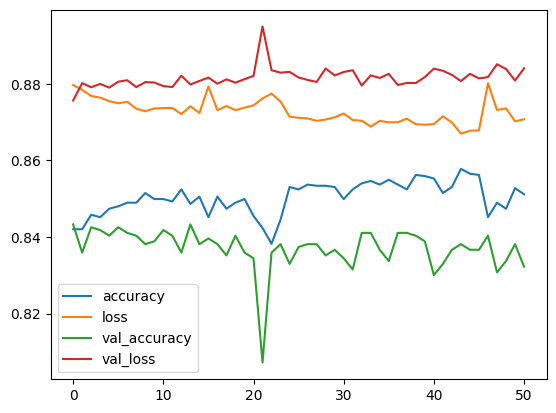

In [ ]:
history=model.fit(
    x_t, y_t,
    epochs=400,
    #validation_split=0.2,
    validation_data=[x_te,y_te],
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=50,restore_best_weights=True)],
    verbose=1
)
pd.DataFrame(history.history).plot()

Running K-Fold cross-validation with K=2...
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running K-Fold cross-validation with K=3...
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running K-Fold cross-validation with K=4...
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running K-Fold cross-validation with K=5...
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Running K-Fold cross-validation with K=6...
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


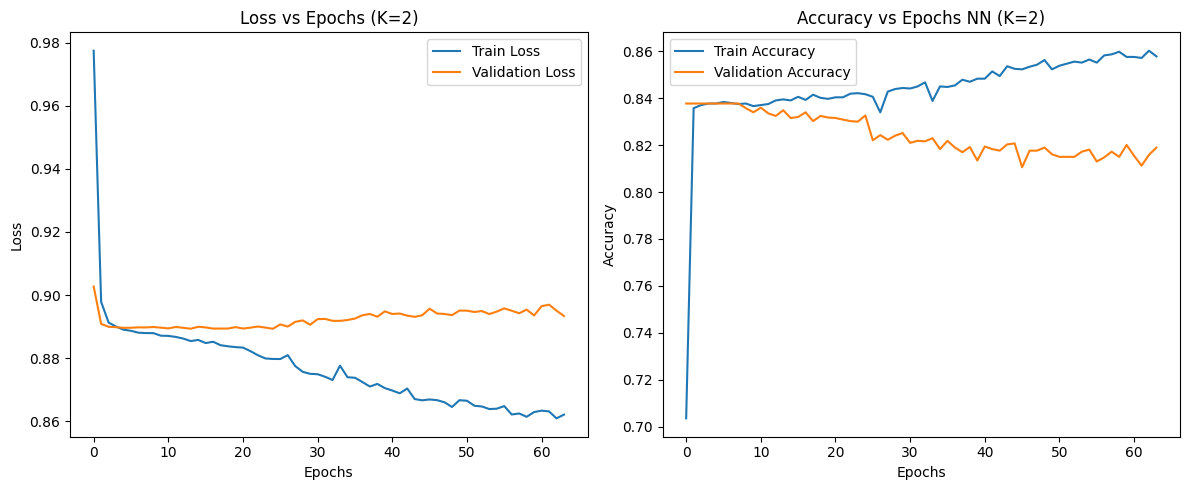

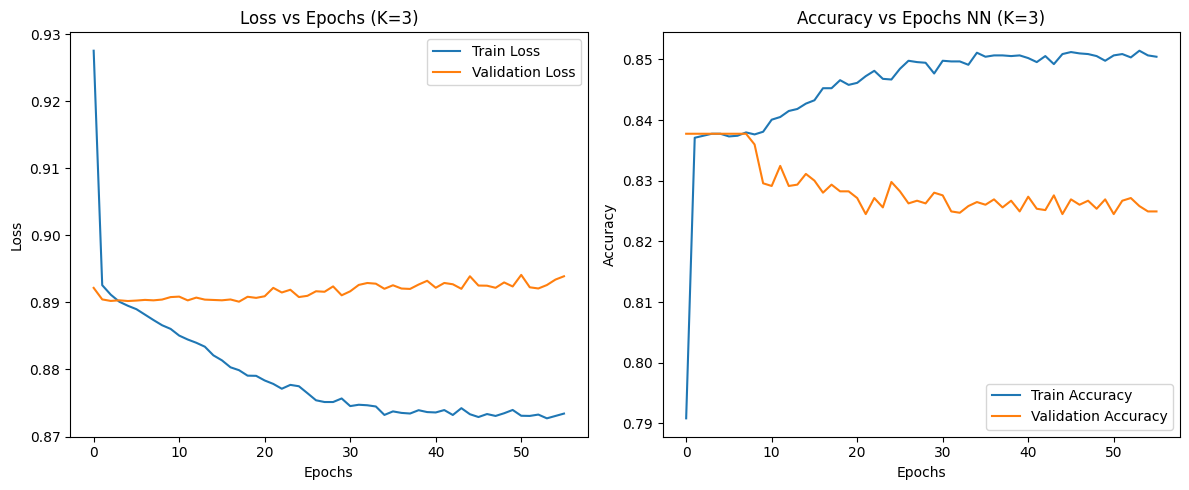

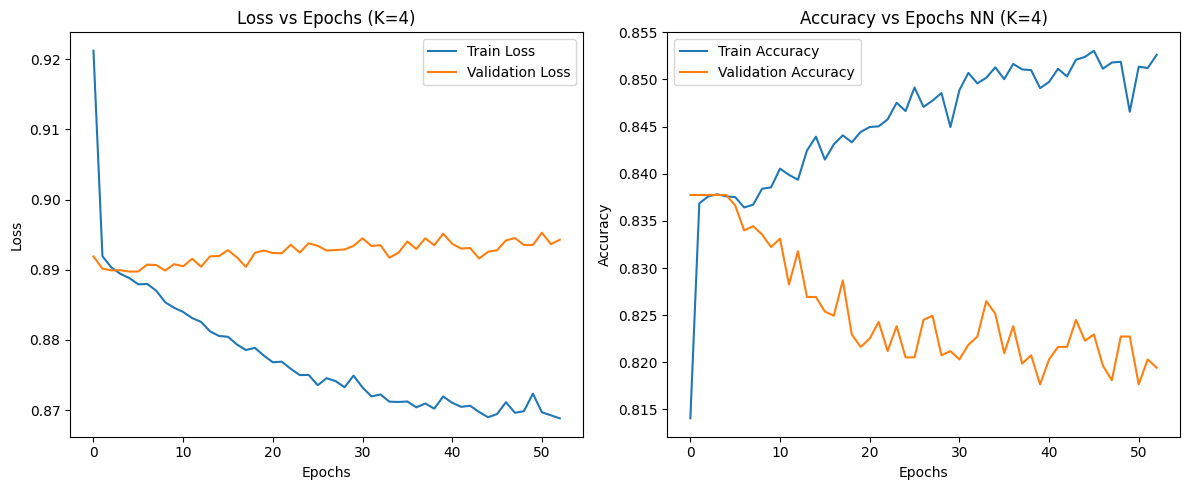

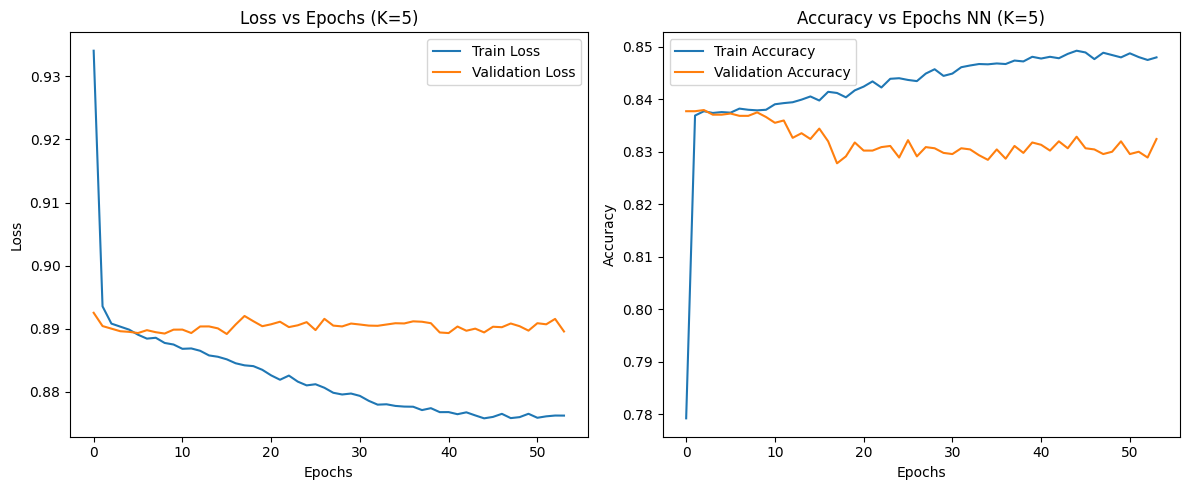

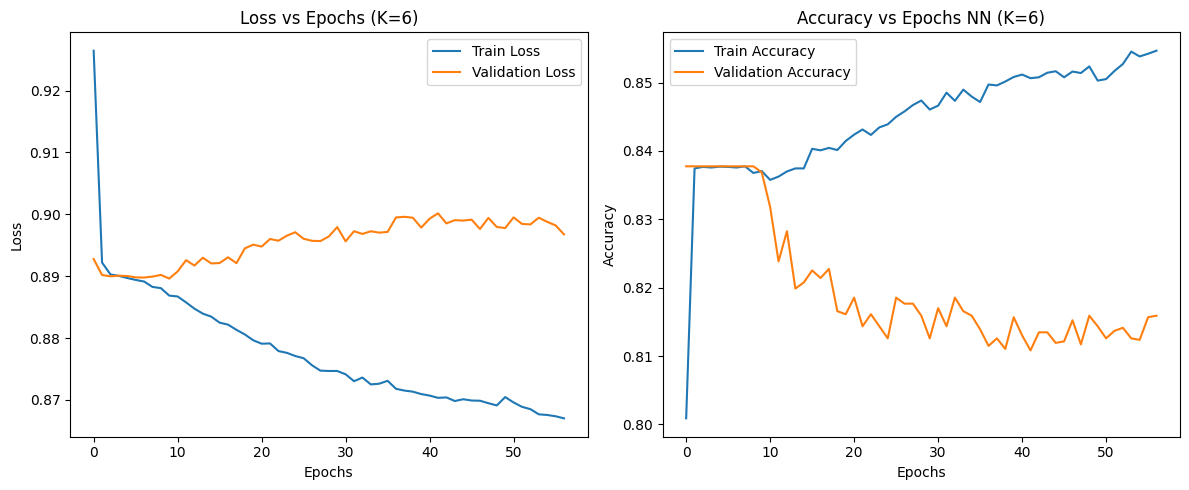

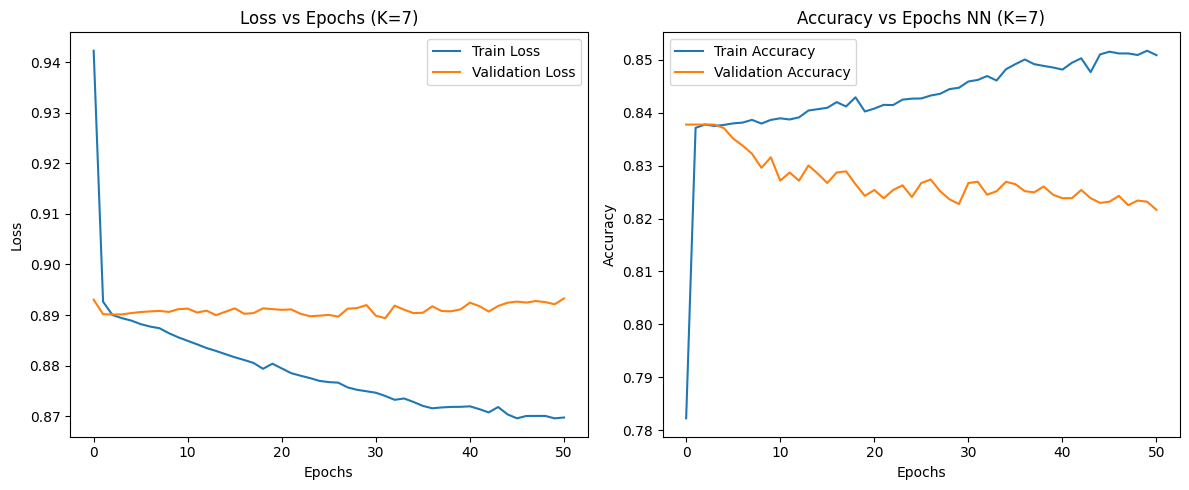

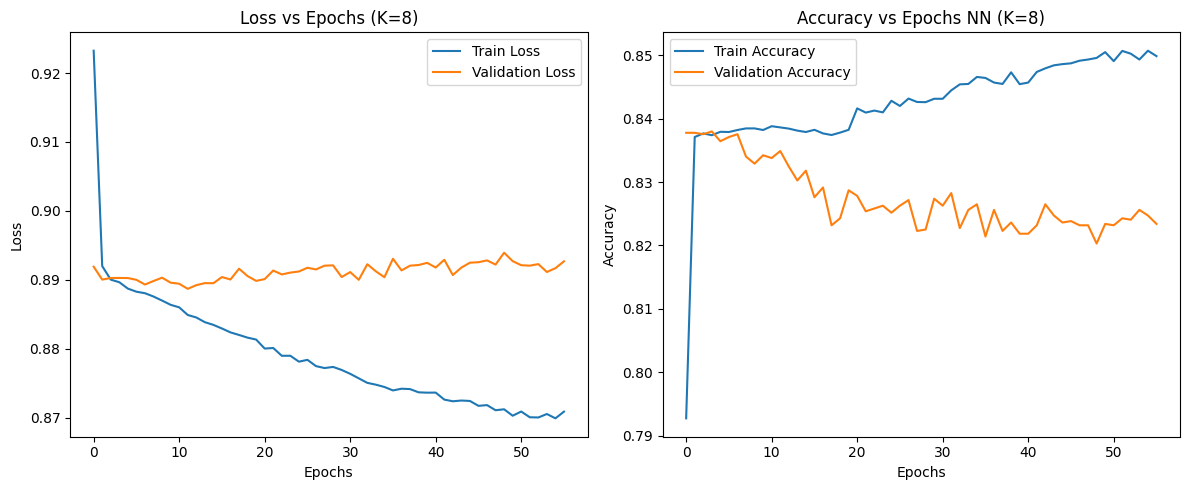

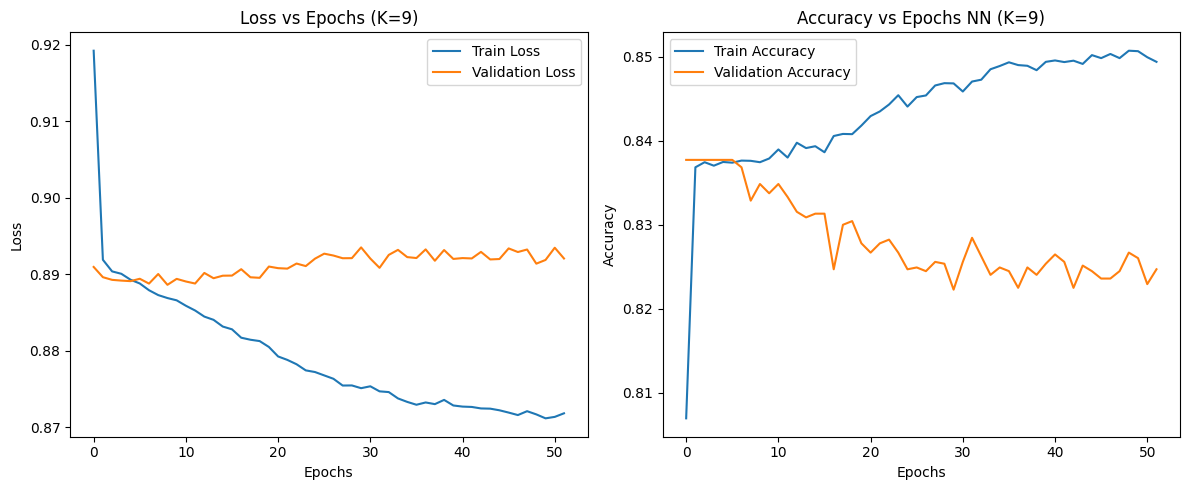

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define the range of K values
k_values = range(2, 10)

# Initialize a dictionary to store history of training for each K
history_per_k = {}

# Loop through each value of K (from 2 to 10)
for k in k_values:
    print(f"Running K-Fold cross-validation with K={k}...")

    # Initialize Stratified K-Fold
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    # Lists to store loss, accuracy, and F1 scores for each fold
    fold_loss=[]
    fold_val_loss=[]
    fold_accuracy=[]
    fold_val_accuracy=[]
    f1_per_fold=[]
    fold_no=1

    # Loop through each fold
    for train_index, test_index in skf.split(x, y):
        # Split the data into train and validation sets
        X_train,X_test=x[train_index], x[test_index]
        y_train,y_test=y[train_index], y[test_index]

        # Create a new instance of the model
        model=tuner.hypermodel.build(best_hps)

        # Train the model and capture the history
        history=model.fit(X_train, y_train,
                            epochs=250,
                            validation_data=(X_test, y_test),
                            callbacks=[tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)],
                            verbose=0)

    # Append the loss and accuracy for this fold
        # Pad shorter lists with NaN to ensure equal lengths for np.mean
        max_len=250  # Maximum number of epochs

        fold_loss.append(history.history['loss'] + [np.nan] * (max_len - len(history.history['loss'])))
        fold_val_loss.append(history.history['val_loss'] + [np.nan] * (max_len - len(history.history['val_loss'])))
        fold_accuracy.append(history.history['accuracy'] + [np.nan] * (max_len - len(history.history['accuracy'])))
        fold_val_accuracy.append(history.history['val_accuracy'] + [np.nan] * (max_len - len(history.history['val_accuracy'])))

        # Predict on the test fold
        y_pred_1=model.predict(X_test)
        y_pred_1binary=np.where(y_pred_1 > 0.5,1,0)  # Binarize the predictions (threshold at 0.5)
        # Compute the average loss, accuracy
        avg_loss=np.mean(fold_loss,axis=0)
        avg_val_loss=np.mean(fold_val_loss,axis=0)
        avg_accuracy=np.mean(fold_accuracy,axis=0)
        avg_val_accuracy=np.mean(fold_val_accuracy,axis=0)
         # Store the history for each value of K
        history_per_k[k] = {
            'loss': avg_loss,
            'val_loss': avg_val_loss,
            'accuracy': avg_accuracy,
            'val_accuracy': avg_val_accuracy,
            }


# Plot loss and accuracy versus epochs for each K
for k in k_values:
    plt.figure(figsize=(12,5))

    # Plot loss
    plt.subplot(1,2,1)
    plt.plot(history_per_k[k]['loss'],label='Train Loss')
    plt.plot(history_per_k[k]['val_loss'],label='Validation Loss')
    plt.title(f'Loss vs Epochs (K={k})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_per_k[k]['accuracy'],label='Train Accuracy')
    plt.plot(history_per_k[k]['val_accuracy'],label='Validation Accuracy')
    plt.title(f'Accuracy vs Epochs NN (K={k})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


#  PERFORMANCE

* checked the f1 score of test data, plotted the confusion matrix and Auc Roc curve.



In [ ]:
y_p=model.predict(x_te)
y_prob=y_p

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
y_p=np.array(y_p > 0.5, dtype=int)
y_p=y_p.reshape(-1)
accuracy=accuracy_score(y_te,y_p)
f1=f1_score(y_te, y_p,pos_label=0)
score={'accuracy':accuracy,
       'f1':f1
      }
score

{'accuracy': 0.8432671081677704, 'f1': 0.9131675499388504}

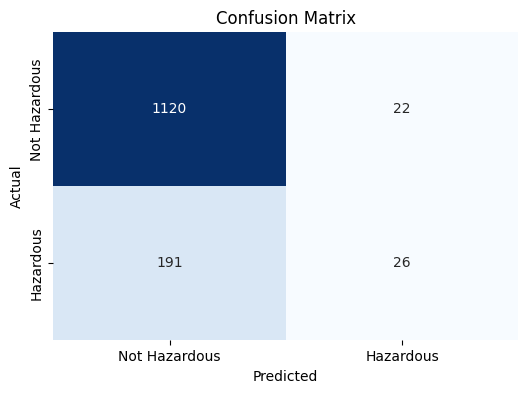

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te, y_p)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Hazardous', 'Hazardous'],
            yticklabels=['Not Hazardous', 'Hazardous'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

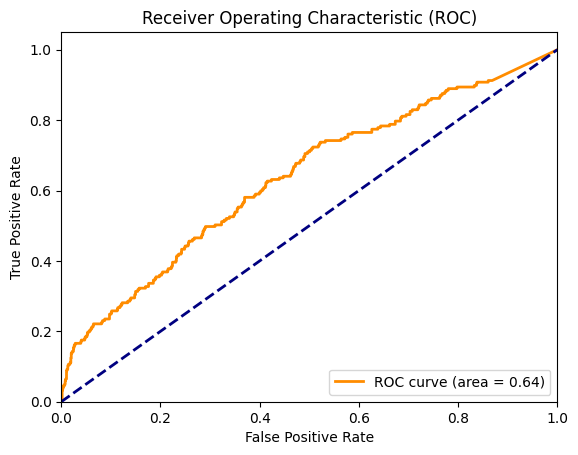

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_te, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# ANOMALY DETECTION

* Used Isolation forest for library based anomaly detection

* For self algorithm based anommaly task, we used a very simple yet very logically relevant approach:
           
       1. As per NASA's webite majority of the celestial object having Tj<3 are comets.
        So we would consider anything having Jupiter Tisserand <3 as anomaly.

       2.Moreover any Object with Tisserand >3 but with very high uncertainity will also  be treated as anomaly



 LIBRARY ANOMALY ANALYSIS

In [ ]:
from sklearn.ensemble import IsolationForest
model_if = IsolationForest(contamination=0.05, random_state=42)
model_if.fit(df)
df['Anomaly_algo']=model_if.predict(df)
df['Anomaly_algo']=df['Anomaly_algo'].replace({-1: 1, 1: 0})
x=df['Anomaly_algo'].sum()
print(f'Number of anomalies detected by Isolation Forest: {x}')

Number of anomalies detected by Isolation Forest: 227


SELF ANAOMALY ANALYSIS




In [ ]:
data = pd.DataFrame(tisserand, columns=['Jupiter Tisserand Invariant'])
data.reset_index(drop=True, inplace=True)
data['Unncertainity']=u
data['Hazardous']=y
data

Jupiter Tisserand Invariant  Unncertainity  Hazardous
0                        4.577380            4.0          1
1                        5.481271            4.0          0
2                        4.557000            3.0          1
3                        5.093000            3.0          0
4                        5.154000            4.0          1
...                           ...            ...        ...
4525                     5.156000            3.0          0
4526                     5.659800            2.0          0
4527                     4.410000            5.0          0
4528                     4.477000            3.0          0
4529                     4.108000            5.0          0

[4530 rows x 3 columns]

<Axes: xlabel='Jupiter Tisserand Invariant', ylabel='Count'>

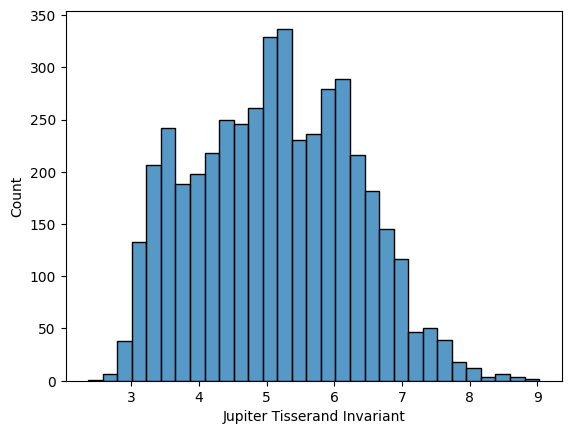

In [ ]:
import seaborn as sns
sns.histplot(data=data, x='Jupiter Tisserand Invariant')

In [ ]:
data.groupby(['Jupiter Tisserand Invariant','Unncertainity']).value_counts()

Jupiter Tisserand Invariant  Unncertainity  Hazardous
2.367000                     9.0            1            1
2.695000                     6.0            0            1
2.759000                     6.0            1            1
2.768000                     3.0            0            1
2.781276                     4.0            0            1
                                                        ..
8.751000                     4.0            1            1
8.752033                     3.0            0            1
8.766916                     4.0            0            1
8.948690                     2.0            1            1
9.025000                     3.0            0            1
Name: count, Length: 4137, dtype: int64

In [ ]:
# Apply conditions to create 'Anomaly' column
data['Anomaly'] = data.apply(lambda row: 1 if (row['Jupiter Tisserand Invariant'] < 3) or
                                        (row['Jupiter Tisserand Invariant'] > 3 and row['Unncertainity'] >= 7)
                                        else 0, axis=1)
x=data['Anomaly'].sum()
print(f'Number of anomalies detected by Our Algorithm: {x}')

Number of anomalies detected by Our Algorithm: 140


In [ ]:
df.reset_index(drop=True, inplace=True)
df['Anomaly_self']=data['Anomaly']

Text(0.5, 1.0, 'Confusion Matrix')

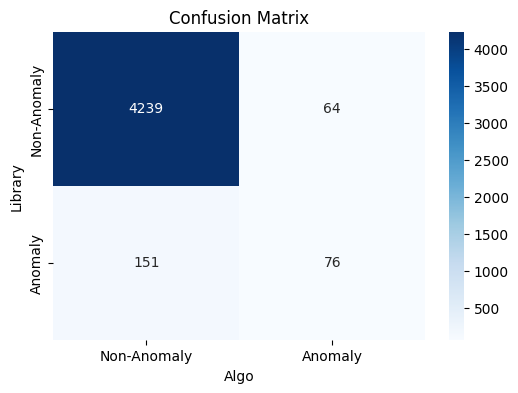

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['Anomaly_algo'], df['Anomaly_self'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Anomaly", "Anomaly"],
            yticklabels=["Non-Anomaly", "Anomaly"])
plt.xlabel("Algo")
plt.ylabel("Library")
plt.title("Confusion Matrix")